In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/" # final_report.ipynbが置いてあるフォルダに適宜書き換えてください

# 歌詞からその歌が作られた年代を予測するモデルを作成する

## 歌詞データの収集
※ data/dataset.csvが存在すればスキップ可能

歌詞を収集するのに使用したサイト: https://www.uta-net.com/

In [ ]:
# 歌詞がまとめてあるサイトから歌詞を読み込む
import requests
from bs4 import BeautifulSoup
import random
random.seed(42)

columns = ["id","タイトル","アーティスト", "作詞者", "発売日","歌詞"]
data = []

cnt = 0
for id in random.sample(range(1,338788), k=10**5): # 1~338788からランダムに10万個サンプリング
  # 使用する歌詞をidで指定し、スクレイピングする
  url = 'https://www.uta-net.com/song/{}/'.format(id)
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  text = soup.get_text()
  text_ls = list(map(str,text.split()))
  # print(text_ls)

  # 存在しないページだった場合、continue
  if ("404" in text_ls) and ("Not" in text_ls) and ("Found" in text_ls):
    continue

  lyricist_ind = -1
  release_ind = -1
  for j in range(len(text_ls)):
    if ("作詞：" in text_ls[j]) and (lyricist_ind == -1):
      # 作詞者の情報が入っているindexを記録
      lyricist_ind = j
    if ("発売日：" in text_ls[j])  and (release_ind == -1):
      # 発売日の情報が入っているindexを記録
      release_ind = j
    if (lyricist_ind != -1) and (release_ind != -1):
      # 両方の情報が手に入ればbreak
      title = text_ls[1]
      artist = text_ls[0]
      lyricist = text_ls[lyricist_ind][3:]
      release = text_ls[release_ind][4:]
      break

  if (lyricist_ind == -1) or (release_ind == -1):
    # どちらかの情報が欠損していればcontinue
    continue

  # 歌詞の始まりと終わりのindexを記録
  start_ind = text_ls.index('シェア')
  end_ind = text_ls.index('この歌詞をマイ歌ネットに登録')
  lyrics = ""
  for k in range(start_ind+1,end_ind):
    lyrics += text_ls[k]
    if k != end_ind - 1:
      lyrics += " "
  data.append([id, title, artist, lyricist, release, lyrics])

  # いくつ歌詞を使用したかを記録
  cnt += 1
  if cnt % 500 == 1:
    print(cnt)

  # 5000個使ったら終了
  if cnt == 10000:
    break

In [ ]:
len(data)

In [ ]:
import pandas as pd
df = pd.DataFrame(data,columns = columns)

In [ ]:
df

In [ ]:
df.to_csv(path + "data/dataset.csv", index = False)

## データの読み込み

### 歌詞データの読み込み

In [ ]:
import pandas as pd

df = pd.read_csv(path + "data/dataset.csv")

In [ ]:
df.head(5)

,id,タイトル,アーティスト,作詞者,発売日,歌詞
0,335244,ユグドラシル,不知火フレア,砂守岳央(未来古代楽団),2023/04/03,世界の果ての大いなる樹の麓より永遠(とわ)の果てへ旅立つは歌声――季節は――巡りて種はいつか...
1,58370,BORDER,唄人羽,唄人羽,2006/05/24,いつだって僕らは嘘つきで 苦しんで空を見上げた見破ってやった僕の仮面 外して雨に濡らしたどう...
2,13113,BECAUSE…,STEEL,柏原収史,2001/06/06,二人の胸は古いパズルのように最後のひとつだけ足りないまま強がるだけじゃもう やり直せないこれ...
3,144195,COME,FTISLAND,Steven,2013/03/27,目と目が合えば まるで Paradise釘付けさ キミしか見えない大袈裟だなんて 決して思わ...
4,128394,タイムカプセル,中村中,中村中,2012/04/18,大人に成ったらなにするの 夢があるってうらやましい私は夢を追うよりも 君ともっと話したかった...


In [ ]:
df_sort = df.sort_values('発売日')

In [ ]:
df_sort

,id,タイトル,アーティスト,作詞者,発売日,歌詞
1161,191815,潮来笠,青江三奈,佐伯孝夫,1969/05/25,潮来の伊太郎 ちょっと見なれば薄情そうな 渡り鳥それでいいのさ あの移り気な風が吹くまま 西...
2073,261235,幸せ正面だーれ,水前寺清子,関沢新一,1974/07/25,探せ 探せ 廻りに一ぱいござるそれそれなんだァ 幸せ正面だーれわるいことあっても ガンバルさ...
2577,289449,約束,山口百恵,阿木燿子,1977/05/21,呼びつけにしても良いでしょうかひたむきに生きていた 四人の少女達明るい子と書いて 明子幸福 ...
3116,183929,ディープ・ソウル,大橋純子,松本隆,1978/12/16,潮風 砂に線をひき失った恋の熱さまし一人でも生きれる……(嘘が上手ね)エナメルの靴が濡れてる...
1627,48997,and,CHAGE,飛鳥涼,1981/05/25,燃えさかる街を さまよい歩いた地平の彼方に 沈む夕陽が紅い見上げる空に 傷ついた鳩が悲しげな...
...,...,...,...,...,...,...
2850,338465,ツッパれ！生涯反発,猿川慧,森めぐ,2023/06/02,いったれ！人生一発 (Fu！ Fu！)やったれ！生涯反発あっぱれ！人生一発 (Fu！ Fu！...
2149,338370,Your,pavilion,森夏月,2023/06/07,お前のイヌは熱心だ今日も必死にケツを探す無限シーソーに乗って上がった側を落とし続けるお前のイ...
3317,338409,Summer,RIEHATA,RIEHATA・HIROMI,2023/06/07,Fallin' I'm fallin'In love with my bodyTake me...
4454,338653,Tell,FANTASTICS,Masaya,2023/06/09,ただ広いだけそんな街 走り抜ける Speed of lightWe on a roll キミ...


In [ ]:
df["発売年"] = [date[:4] for date in list(df["発売日"])]
df["年代"] = [(int(year)//10)*10 for year in list(df["発売年"])]

In [ ]:
df.head(5)

,id,タイトル,アーティスト,作詞者,発売日,歌詞,発売年,年代
0,335244,ユグドラシル,不知火フレア,砂守岳央(未来古代楽団),2023/04/03,世界の果ての大いなる樹の麓より永遠(とわ)の果てへ旅立つは歌声――季節は――巡りて種はいつか...,2023,2020
1,58370,BORDER,唄人羽,唄人羽,2006/05/24,いつだって僕らは嘘つきで 苦しんで空を見上げた見破ってやった僕の仮面 外して雨に濡らしたどう...,2006,2000
2,13113,BECAUSE…,STEEL,柏原収史,2001/06/06,二人の胸は古いパズルのように最後のひとつだけ足りないまま強がるだけじゃもう やり直せないこれ...,2001,2000
3,144195,COME,FTISLAND,Steven,2013/03/27,目と目が合えば まるで Paradise釘付けさ キミしか見えない大袈裟だなんて 決して思わ...,2013,2010
4,128394,タイムカプセル,中村中,中村中,2012/04/18,大人に成ったらなにするの 夢があるってうらやましい私は夢を追うよりも 君ともっと話したかった...,2012,2010


In [ ]:
print(min(df["年代"]))
print(max(df["年代"]))
for period in range(min(df["年代"]),max(df["年代"])+1,10):
  print("年代:",period,"歌詞数:",(df["年代"] == period).sum())

1960
2020
年代: 1960 歌詞数: 1
年代: 1970 歌詞数: 3
年代: 1980 歌詞数: 69
年代: 1990 歌詞数: 1005
年代: 2000 歌詞数: 2722
年代: 2010 歌詞数: 4600
年代: 2020 歌詞数: 1600


### 不均衡データになるのを防ぐため、1990年代、2000年代、2010年代、2020年代の4クラスから、1000個ずつ歌詞を抽出した学習用データを作成する

In [ ]:
df_1990 = df[df["年代"] == 1990].head(1000)
df_2000 = df[df["年代"] == 2000].head(1000)
df_2010 = df[df["年代"] == 2010].head(1000)
df_2020 = df[df["年代"] == 2020].head(1000)

In [ ]:
print(len(df_1990),len(df_2000),len(df_2010),len(df_2020))

1000 1000 1000 1000


In [ ]:
df_for_use =  pd.concat([df_1990, df_2000, df_2010, df_2020])

In [ ]:
df_for_use = df_for_use.sample(frac=1,ignore_index=True,random_state=42)

In [ ]:
df_for_use

,id,タイトル,アーティスト,作詞者,発売日,歌詞,発売年,年代
0,184073,Time,大橋純子,JUNKO,1996/09/01,哀しみを抱えたまま その腕に抱かれたけど“もう誰も愛せない”なんて 投げやりな言い方に少し寂...,1996,1990
1,307760,Soulコブラツイスト～魂の悶絶,桑田佳祐,桑田佳祐,2021/08/30,逢いたくて 恋しくて死ぬほど好きなあなたにフラれた後も I miss you孤独な夜がまた来...,2021,2020
2,191703,HANG,三上博史,Toshinobu,1993/08/21,Heartが Beatが 眩しく からむ妖しく 夢みて 秘密の Hang Out！赤く染めら...,1993,1990
3,295251,砂山,木山裕策,北原白秋,2020/12/16,海は荒海 向うは佐渡よすずめなけなけ もう日は暮れたみんな呼べ呼べ お星さま出たぞ暮れりゃ砂...,2020,2020
4,219562,V,エグスプロージョン,まちゃあき,2016/11/30,ON YOUR MARK！HEY YO！ GET SET！OH！ ONCE IF YOU A...,2016,2010
...,...,...,...,...,...,...,...,...
3995,20303,OCEAN,DEEN,池森秀一,2004/08/18,I say love callsBlue ocean sparkingLove shines...,2004,2000
3996,82825,ゴールデンカントリー,S.R.S,山口卓也・いしわたり淳治,2009/09/09,つまんない授業さぼってあの丘へ繰り出そうつまんないことだってきっと忘れるさ景色は変わんないの...,2009,2000
3997,218556,酔いれんぼ,麻生祐希,荒木とよひさ,1997/12/17,あんたの心が 寂しいときは隣りで この手で 暖めるから世の中なんかは 悲しみばかりせめて 身...,1997,1990
3998,284187,N',ONE,JUNE,2020/04/15,Daylight沈む陽を背にして walking now少しずつ遠くなる影追いかけて今どこに...,2020,2020


In [ ]:
df_for_use.to_csv(path + "data/data_natural_language.csv",index=False)

## NEologdを使った形態素解析

https://qiita.com/yufuji25/items/9eb9cefbec5db49fab06

https://hakasenote.hnishi.com/2020/20200719-mecab-neologd-in-colab/

### ライブラリのインストール

In [ ]:
# MeCabのインストール
!apt install mecab libmecab-dev mecab-ipadic-utf8
!pip install mecab-python3

# mecab-ipadic-NEologdのインストール
!apt install git make curl xz-utils file
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

# Ref: https://qiita.com/Fulltea/items/90f6ebe6dcceaf64eaef
# Ref: https://qiita.com/SUZUKI_Masaya/items/685000d569452585210c

!ln -s /etc/mecabrc /usr/local/etc/mecabrc
# Ref: https://qiita.com/Naritoshi/items/8f55d7d5cce9ce414395

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils
0 upgraded, 6 newly installed, 0 to remove and 15 not upgraded.
Need to get 7,373 kB of archives.
After this operation, 60.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libmecab2 amd64 0.996-10build1 [233 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libmecab-dev amd64 0.996-10build1 [285 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 mecab-utils amd64 0.996-10build1 [4,912 B]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 mecab-ipadic all 2.7.0-20070801+main-2.1 [6,714 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/universe amd64 mecab amd64 0.996-10build1 [132 kB]
Get:6 http://archive.ubuntu.c

In [ ]:
import MeCab
import subprocess

### NEologdの出力をリストで返す関数

In [ ]:
def NEologd_list(text):
    # path = "-d /mecab-ipadic-neologd"
    cmd='echo `mecab-config --dicdir`"/mecab-ipadic-neologd"'
    path = (subprocess.Popen(cmd, stdout=subprocess.PIPE,
                              shell=True).communicate()[0]).decode('utf-8')
    tagger = MeCab.Tagger(path)
    tagger.parse('')
    text = str(text).lower() # in method 'Tagger_parseToNode', argument 2 of type 'char const *' に対する対処のおまじない
    node = tagger.parseToNode(text)
    word_class = []
    while node:
        word = node.surface
        wclass = node.feature.split(',')
        if wclass[0] != u'BOS/EOS':
            if wclass[6] == None:
                word_class.append((word,wclass[0],wclass[1],wclass[2],""))
            else:
                word_class.append((word,wclass[0],wclass[1],wclass[2],wclass[6]))
        node = node.next
    return word_class


### Neolgdの練習

In [ ]:
ex = NEologd_list("そこらへんは、時間あれば次の記事とかに書こうかなと思います。生きられる時間が決まっているからこそ、人生は儚い")
print(ex)
nouns = {}
adjectives = {}
i = 0
for word in ex:
  if word[1] == '名詞':
    if '{}'.format(word[0]) in nouns:
        nouns["{}".format(word[0])].append(i)
    else:
        nouns["{}".format(word[0])] = [i]
  if word[1] == '形容詞':
    if '{}'.format(word[0]) in nouns:
      adjectives["{}".format(word[0])].append(i)
    else:
      adjectives["{}".format(word[0])] = [i]
  i += 1

print(nouns)
print(adjectives)

[('そこら', '副詞', '一般', '*', 'そこら'), ('へん', '名詞', '一般', '*', 'へん'), ('は', '助詞', '係助詞', '*', 'は'), ('、', '記号', '読点', '*', '、'), ('時間', '名詞', '副詞可能', '*', '時間'), ('あれ', '動詞', '自立', '*', 'ある'), ('ば', '助詞', '接続助詞', '*', 'ば'), ('次', '名詞', '一般', '*', '次'), ('の', '助詞', '連体化', '*', 'の'), ('記事', '名詞', '一般', '*', '記事'), ('とか', '助詞', '並立助詞', '*', 'とか'), ('に', '助詞', '格助詞', '一般', 'に'), ('書こ', '動詞', '自立', '*', '書く'), ('う', '助動詞', '*', '*', 'う'), ('か', '助詞', '副助詞／並立助詞／終助詞', '*', 'か'), ('な', '助詞', '終助詞', '*', 'な'), ('と', '助詞', '格助詞', '引用', 'と'), ('思い', '動詞', '自立', '*', '思う'), ('ます', '助動詞', '*', '*', 'ます'), ('。', '記号', '句点', '*', '。'), ('生き', '動詞', '自立', '*', '生きる'), ('られる', '動詞', '接尾', '*', 'られる'), ('時間', '名詞', '副詞可能', '*', '時間'), ('が', '助詞', '格助詞', '一般', 'が'), ('決まっ', '動詞', '自立', '*', '決まる'), ('て', '助詞', '接続助詞', '*', 'て'), ('いる', '動詞', '非自立', '*', 'いる'), ('から', '助詞', '接続助詞', '*', 'から'), ('こそ', '助詞', '係助詞', '*', 'こそ'), ('、', '記号', '読点', '*', '、'), ('人生', '名詞', '一般', '*', '人生'), ('は', '助詞', '係助詞', '*', 'は

### データの読み込み

In [ ]:
df = pd.read_csv(path + "data/data_natural_language.csv")

In [ ]:
df_for_use.drop(["id", "タイトル", "アーティスト", "作詞者", "発売日", "発売年"], axis=1, inplace=True)

In [ ]:
df_for_use.head(5)

,歌詞,年代
0,哀しみを抱えたまま その腕に抱かれたけど“もう誰も愛せない”なんて 投げやりな言い方に少し寂...,1990
1,逢いたくて 恋しくて死ぬほど好きなあなたにフラれた後も I miss you孤独な夜がまた来...,2020
2,Heartが Beatが 眩しく からむ妖しく 夢みて 秘密の Hang Out！赤く染めら...,1990
3,海は荒海 向うは佐渡よすずめなけなけ もう日は暮れたみんな呼べ呼べ お星さま出たぞ暮れりゃ砂...,2020
4,ON YOUR MARK！HEY YO！ GET SET！OH！ ONCE IF YOU A...,2010


### unigram列を追加

In [ ]:
def add_unigram(df):
  #各クラスに属する単語をつなげていく文字列をリストにして保存
  for i in range(len(df)):
    if i % 10000 == 0:
      print(i)
    sentence = df.loc[i]['歌詞']
    words = NEologd_list(sentence) #NEologd版
    adjectives = ""
    nouns = ""
    nvas = ""
    alls = ""
    for word in words:
      alls += " {}".format(word[0])
      if (word[1] == "名詞") or (word[1] == "形容詞") or (word[1] == "動詞"):
        nvas += " {}".format(word[0])
        if word[1] == "名詞":
          nouns += " {}".format(word[0])
        if word[1] == "形容詞":
          adjectives += " {}".format(word[0])
    df.loc[i,"uni_adjectives"] = adjectives
    df.loc[i,"uni_nouns"] = nouns
    df.loc[i,"uni_nvas"] = nvas
    df.loc[i,"uni_alls"] = alls

  return

In [ ]:
df_for_use["uni_adjectives"] =  ""
df_for_use["uni_nouns"] =  ""
df_for_use["uni_nvas"] =  ""
df_for_use["uni_alls"] =  ""
add_unigram(df_for_use)

0


In [ ]:
df_for_use.head(5)

,歌詞,年代,uni_adjectives,uni_nouns,uni_nvas,uni_alls
0,哀しみを抱えたまま その腕に抱かれたけど“もう誰も愛せない”なんて 投げやりな言い方に少し寂...,1990,寂し いい やさし 辛い 哀しい ない 切ない,哀しみ まま 腕 誰 投げやり 言い方 そう 目 あなた ...... time afte...,哀しみ 抱え まま 腕 抱か れ 誰 愛せ 投げやり 言い方 寂し そう 目 し 待てる ...,哀しみ を 抱え た まま その 腕 に 抱か れ た けど “ もう 誰 も 愛せ ない...
1,逢いたくて 恋しくて死ぬほど好きなあなたにフラれた後も I miss you孤独な夜がまた来...,2020,恋しく 甘く 赤い く 悲しい,好き あなた フラ 後 i miss you 孤独 夜 i ' m alright 今夜 ...,逢い 恋しく 死ぬ 好き あなた フラ れ 後 i miss you 孤独 夜 来る i ...,逢い たく て 恋しく て 死ぬ ほど 好き な あなた に フラ れ た 後 も i m...
2,Heartが Beatが 眩しく からむ妖しく 夢みて 秘密の Hang Out！赤く染めら...,1990,眩しく 妖しく 赤く ない やさしい 長く 眩しく 妖しく ない 妖しく 妖しく,heart beat 秘密 hang out 風 色 君 性 雲間 不死鳥 時 流れ 強烈...,heart beat 眩しく からむ 妖しく 夢み 秘密 hang out 赤く 染め ら...,heart が beat が 眩しく からむ 妖しく 夢み て 秘密 の hang out...
3,海は荒海 向うは佐渡よすずめなけなけ もう日は暮れたみんな呼べ呼べ お星さま出たぞ暮れりゃ砂...,2020,,海 荒海 向う 佐渡 すずめ 日 みんな 星 さま 砂山 汐 鳴り すずめ ちり ぢ 風 ...,海 荒海 向う 佐渡 すずめ なけ 日 暮れ みんな 呼べ 呼べ 星 さま 出 暮れりゃ ...,海 は 荒海 向う は 佐渡 よ すずめ な け なけ もう 日 は 暮れ た みんな 呼...
4,ON YOUR MARK！HEY YO！ GET SET！OH！ ONCE IF YOU A...,2010,いい 物足りない ない もったいない いい 苦し ない,on your mark hey yo get set oh once if you ar...,on your mark hey yo get set oh once if you ar...,on your mark ！ hey yo ！ get set ！ oh ！ once i...


### trigiramとfourgram列を追加

In [ ]:
def n_gram(target, n):
  # 基準を1文字(単語)ずつ ずらしながらn文字分抜き出す
  return [ target[idx:idx + n] for idx in range(len(target) - n + 1)]

In [ ]:
def list_to_str(l):
  l_str = ""
  for i in range(len(l)):
    tmp = ""
    for j in range(len(l[i])):
      if j != 0:
        tmp += "/"
      tmp += l[i][j]

    if i != 0:
      tmp = " " + tmp
    l_str += tmp

  return l_str

In [ ]:
def add_trigram_fourgram(df):
  #各クラスに属する単語をつなげていく文字列をリストにして保存
  for i in range(len(df)):
    if i % 10000 == 0:
      print(i)
    uni_nouns = str(df.loc[i]['uni_nouns'])
    uni_nvas = str(df.loc[i]['uni_nvas'])
    uni_alls = str(df.loc[i]['uni_alls'])
    uni_nouns_split = list(uni_nouns.split(" "))[1:]
    uni_nvas_split = list(uni_nvas.split(" "))[1:]
    uni_alls_split = list(uni_alls.split(" "))[1:]

    tri_nouns = ""
    tri_nvas = ""
    tri_alls = ""
    four_nouns = ""
    four_nvas = ""
    four_alls = ""

    if len(uni_nouns_split) >= 3:
      tri_nouns = n_gram(uni_nouns_split,3)
      if len(uni_nouns_split) >= 4:
        four_nouns = n_gram(uni_nouns_split,4)
    if len(uni_nvas_split) >= 3:
      tri_nvas = n_gram(uni_nvas_split,3)
      if len(uni_nvas_split) >= 4:
        four_nvas = n_gram(uni_nvas_split,4)
    if len(uni_alls_split) >= 3:
      tri_alls = n_gram(uni_alls_split,3)
      if len(uni_alls_split) >= 4:
        four_alls = n_gram(uni_alls_split,4)

    tri_nouns_str = ""
    tri_nvas_str = ""
    tri_alls_str = ""
    four_nouns_str = ""
    four_nvas_str = ""
    four_alls_str = ""

    tri_nouns_str = list_to_str(tri_nouns)
    tri_nvas_str = list_to_str(tri_nvas)
    tri_alls_str = list_to_str(tri_alls)
    four_nouns_str = list_to_str(four_nouns)
    four_nvas_str = list_to_str(four_nvas)
    four_alls_str = list_to_str(four_alls)

    df.loc[i,"tri_nouns"] = tri_nouns_str
    df.loc[i,"tri_nvas"] = tri_nvas_str
    df.loc[i,"tri_alls"] = tri_alls_str
    df.loc[i,"four_nouns"] = four_nouns_str
    df.loc[i,"four_nvas"] = four_nvas_str
    df.loc[i,"four_alls"] = four_alls_str

  return

In [ ]:
df_for_use["tri_nouns"] =  ""
df_for_use["tri_nvas"] =  ""
df_for_use["tri_alls"] =  ""
df_for_use["four_nouns"] =  ""
df_for_use["four_nvas"] =  ""
df_for_use["four_alls"] =  ""
add_trigram_fourgram(df_for_use)

0


In [ ]:
df_for_use.head(5)

,歌詞,年代,uni_adjectives,uni_nouns,uni_nvas,uni_alls,tri_nouns,tri_nvas,tri_alls,four_nouns,four_nvas,four_alls
0,哀しみを抱えたまま その腕に抱かれたけど“もう誰も愛せない”なんて 投げやりな言い方に少し寂...,1990,寂し いい やさし 辛い 哀しい ない 切ない,哀しみ まま 腕 誰 投げやり 言い方 そう 目 あなた ...... time afte...,哀しみ 抱え まま 腕 抱か れ 誰 愛せ 投げやり 言い方 寂し そう 目 し 待てる ...,哀しみ を 抱え た まま その 腕 に 抱か れ た けど “ もう 誰 も 愛せ ない...,哀しみ/まま/腕 まま/腕/誰 腕/誰/投げやり 誰/投げやり/言い方 投げやり/言い方/そ...,哀しみ/抱え/まま 抱え/まま/腕 まま/腕/抱か 腕/抱か/れ 抱か/れ/誰 れ/誰/愛せ...,哀しみ/を/抱え を/抱え/た 抱え/た/まま た/まま/その まま/その/腕 その/腕/に...,哀しみ/まま/腕/誰 まま/腕/誰/投げやり 腕/誰/投げやり/言い方 誰/投げやり/言い方...,哀しみ/抱え/まま/腕 抱え/まま/腕/抱か まま/腕/抱か/れ 腕/抱か/れ/誰 抱か/れ...,哀しみ/を/抱え/た を/抱え/た/まま 抱え/た/まま/その た/まま/その/腕 まま/そ...
1,逢いたくて 恋しくて死ぬほど好きなあなたにフラれた後も I miss you孤独な夜がまた来...,2020,恋しく 甘く 赤い く 悲しい,好き あなた フラ 後 i miss you 孤独 夜 i ' m alright 今夜 ...,逢い 恋しく 死ぬ 好き あなた フラ れ 後 i miss you 孤独 夜 来る i ...,逢い たく て 恋しく て 死ぬ ほど 好き な あなた に フラ れ た 後 も i m...,好き/あなた/フラ あなた/フラ/後 フラ/後/i 後/i/miss i/miss/you ...,逢い/恋しく/死ぬ 恋しく/死ぬ/好き 死ぬ/好き/あなた 好き/あなた/フラ あなた/フラ...,逢い/たく/て たく/て/恋しく て/恋しく/て 恋しく/て/死ぬ て/死ぬ/ほど 死ぬ/ほ...,好き/あなた/フラ/後 あなた/フラ/後/i フラ/後/i/miss 後/i/miss/yo...,逢い/恋しく/死ぬ/好き 恋しく/死ぬ/好き/あなた 死ぬ/好き/あなた/フラ 好き/あなた...,逢い/たく/て/恋しく たく/て/恋しく/て て/恋しく/て/死ぬ 恋しく/て/死ぬ/ほど ...
2,Heartが Beatが 眩しく からむ妖しく 夢みて 秘密の Hang Out！赤く染めら...,1990,眩しく 妖しく 赤く ない やさしい 長く 眩しく 妖しく ない 妖しく 妖しく,heart beat 秘密 hang out 風 色 君 性 雲間 不死鳥 時 流れ 強烈...,heart beat 眩しく からむ 妖しく 夢み 秘密 hang out 赤く 染め ら...,heart が beat が 眩しく からむ 妖しく 夢み て 秘密 の hang out...,heart/beat/秘密 beat/秘密/hang 秘密/hang/out hang/ou...,heart/beat/眩しく beat/眩しく/からむ 眩しく/からむ/妖しく からむ/妖し...,heart/が/beat が/beat/が beat/が/眩しく が/眩しく/からむ 眩しく...,heart/beat/秘密/hang beat/秘密/hang/out 秘密/hang/ou...,heart/beat/眩しく/からむ beat/眩しく/からむ/妖しく 眩しく/からむ/妖し...,heart/が/beat/が が/beat/が/眩しく beat/が/眩しく/からむ が/眩...
3,海は荒海 向うは佐渡よすずめなけなけ もう日は暮れたみんな呼べ呼べ お星さま出たぞ暮れりゃ砂...,2020,,海 荒海 向う 佐渡 すずめ 日 みんな 星 さま 砂山 汐 鳴り すずめ ちり ぢ 風 ...,海 荒海 向う 佐渡 すずめ なけ 日 暮れ みんな 呼べ 呼べ 星 さま 出 暮れりゃ ...,海 は 荒海 向う は 佐渡 よ すずめ な け なけ もう 日 は 暮れ た みんな 呼...,海/荒海/向う 荒海/向う/佐渡 向う/佐渡/すずめ 佐渡/すずめ/日 すずめ/日/みんな ...,海/荒海/向う 荒海/向う/佐渡 向う/佐渡/すずめ 佐渡/すずめ/なけ すずめ/なけ/日 ...,海/は/荒海 は/荒海/向う 荒海/向う/は 向う/は/佐渡 は/佐渡/よ 佐渡/よ/すずめ...,海/荒海/向う/佐渡 荒海/向う/佐渡/すずめ 向う/佐渡/すずめ/日 佐渡/すずめ/日/み...,海/荒海/向う/佐渡 荒海/向う/佐渡/すずめ 向う/佐渡/すずめ/なけ 佐渡/すずめ/なけ...,海/は/荒海/向う は/荒海/向う/は 荒海/向う/は/佐渡 向う/は/佐渡/よ は/佐渡/...
4,ON YOUR MARK！HEY YO！ GET SET！OH！ ONCE IF YOU A...,2010,いい 物足りない ない もったいない いい 苦し ない,on your mark hey yo get set oh once if you ar...,on your mark hey yo get set oh once if you ar...,on your mark ！ hey yo ！ get set ！ oh ！ once i...,on/your/mark your/mark/hey mark/hey/yo hey/yo/...,on/your/mark your/mark/hey mark/hey/yo hey/yo/...,on/your/mark your/mark/！ mark/！/hey ！/hey/yo h...,on/your/mark/hey your/mark/hey/yo mark/hey/yo/...,on/your/mark/hey your/mark/hey/yo mark/hey/yo/...,on/your/mark/！ your/mark/！/hey mark/！/hey/yo ！...


### 保存

In [ ]:
df_for_use.to_csv(path + "data/data_natural_language_morpheme.csv",index=False)

In [ ]:
df = pd.read_csv(path + "data/data_natural_language_morpheme.csv")

In [ ]:
df.head(5)

,歌詞,年代,uni_adjectives,uni_nouns,uni_nvas,uni_alls,tri_nouns,tri_nvas,tri_alls,four_nouns,four_nvas,four_alls
0,哀しみを抱えたまま その腕に抱かれたけど“もう誰も愛せない”なんて 投げやりな言い方に少し寂...,1990,寂し いい やさし 辛い 哀しい ない 切ない,哀しみ まま 腕 誰 投げやり 言い方 そう 目 あなた ...... time afte...,哀しみ 抱え まま 腕 抱か れ 誰 愛せ 投げやり 言い方 寂し そう 目 し 待てる ...,哀しみ を 抱え た まま その 腕 に 抱か れ た けど “ もう 誰 も 愛せ ない...,哀しみ/まま/腕 まま/腕/誰 腕/誰/投げやり 誰/投げやり/言い方 投げやり/言い方/そ...,哀しみ/抱え/まま 抱え/まま/腕 まま/腕/抱か 腕/抱か/れ 抱か/れ/誰 れ/誰/愛せ...,哀しみ/を/抱え を/抱え/た 抱え/た/まま た/まま/その まま/その/腕 その/腕/に...,哀しみ/まま/腕/誰 まま/腕/誰/投げやり 腕/誰/投げやり/言い方 誰/投げやり/言い方...,哀しみ/抱え/まま/腕 抱え/まま/腕/抱か まま/腕/抱か/れ 腕/抱か/れ/誰 抱か/れ...,哀しみ/を/抱え/た を/抱え/た/まま 抱え/た/まま/その た/まま/その/腕 まま/そ...
1,逢いたくて 恋しくて死ぬほど好きなあなたにフラれた後も I miss you孤独な夜がまた来...,2020,恋しく 甘く 赤い く 悲しい,好き あなた フラ 後 i miss you 孤独 夜 i ' m alright 今夜 ...,逢い 恋しく 死ぬ 好き あなた フラ れ 後 i miss you 孤独 夜 来る i ...,逢い たく て 恋しく て 死ぬ ほど 好き な あなた に フラ れ た 後 も i m...,好き/あなた/フラ あなた/フラ/後 フラ/後/i 後/i/miss i/miss/you ...,逢い/恋しく/死ぬ 恋しく/死ぬ/好き 死ぬ/好き/あなた 好き/あなた/フラ あなた/フラ...,逢い/たく/て たく/て/恋しく て/恋しく/て 恋しく/て/死ぬ て/死ぬ/ほど 死ぬ/ほ...,好き/あなた/フラ/後 あなた/フラ/後/i フラ/後/i/miss 後/i/miss/yo...,逢い/恋しく/死ぬ/好き 恋しく/死ぬ/好き/あなた 死ぬ/好き/あなた/フラ 好き/あなた...,逢い/たく/て/恋しく たく/て/恋しく/て て/恋しく/て/死ぬ 恋しく/て/死ぬ/ほど ...
2,Heartが Beatが 眩しく からむ妖しく 夢みて 秘密の Hang Out！赤く染めら...,1990,眩しく 妖しく 赤く ない やさしい 長く 眩しく 妖しく ない 妖しく 妖しく,heart beat 秘密 hang out 風 色 君 性 雲間 不死鳥 時 流れ 強烈...,heart beat 眩しく からむ 妖しく 夢み 秘密 hang out 赤く 染め ら...,heart が beat が 眩しく からむ 妖しく 夢み て 秘密 の hang out...,heart/beat/秘密 beat/秘密/hang 秘密/hang/out hang/ou...,heart/beat/眩しく beat/眩しく/からむ 眩しく/からむ/妖しく からむ/妖し...,heart/が/beat が/beat/が beat/が/眩しく が/眩しく/からむ 眩しく...,heart/beat/秘密/hang beat/秘密/hang/out 秘密/hang/ou...,heart/beat/眩しく/からむ beat/眩しく/からむ/妖しく 眩しく/からむ/妖し...,heart/が/beat/が が/beat/が/眩しく beat/が/眩しく/からむ が/眩...
3,海は荒海 向うは佐渡よすずめなけなけ もう日は暮れたみんな呼べ呼べ お星さま出たぞ暮れりゃ砂...,2020,NaN,海 荒海 向う 佐渡 すずめ 日 みんな 星 さま 砂山 汐 鳴り すずめ ちり ぢ 風 ...,海 荒海 向う 佐渡 すずめ なけ 日 暮れ みんな 呼べ 呼べ 星 さま 出 暮れりゃ ...,海 は 荒海 向う は 佐渡 よ すずめ な け なけ もう 日 は 暮れ た みんな 呼...,海/荒海/向う 荒海/向う/佐渡 向う/佐渡/すずめ 佐渡/すずめ/日 すずめ/日/みんな ...,海/荒海/向う 荒海/向う/佐渡 向う/佐渡/すずめ 佐渡/すずめ/なけ すずめ/なけ/日 ...,海/は/荒海 は/荒海/向う 荒海/向う/は 向う/は/佐渡 は/佐渡/よ 佐渡/よ/すずめ...,海/荒海/向う/佐渡 荒海/向う/佐渡/すずめ 向う/佐渡/すずめ/日 佐渡/すずめ/日/み...,海/荒海/向う/佐渡 荒海/向う/佐渡/すずめ 向う/佐渡/すずめ/なけ 佐渡/すずめ/なけ...,海/は/荒海/向う は/荒海/向う/は 荒海/向う/は/佐渡 向う/は/佐渡/よ は/佐渡/...
4,ON YOUR MARK！HEY YO！ GET SET！OH！ ONCE IF YOU A...,2010,いい 物足りない ない もったいない いい 苦し ない,on your mark hey yo get set oh once if you ar...,on your mark hey yo get set oh once if you ar...,on your mark ！ hey yo ！ get set ！ oh ！ once i...,on/your/mark your/mark/hey mark/hey/yo hey/yo/...,on/your/mark your/mark/hey mark/hey/yo hey/yo/...,on/your/mark your/mark/！ mark/！/hey ！/hey/yo h...,on/your/mark/hey your/mark/hey/yo mark/hey/yo/...,on/your/mark/hey your/mark/hey/yo mark/hey/yo/...,on/your/mark/！ your/mark/！/hey mark/！/hey/yo ！...


## ngramとTF-IDFを使った各クラスの単語解析

### ngram列を持つデータの読み込み

In [ ]:
import pandas as pd
df = pd.read_csv(path + "data/data_natural_language_morpheme.csv")

In [ ]:
df.head(5)

,歌詞,年代,uni_adjectives,uni_nouns,uni_nvas,uni_alls,tri_nouns,tri_nvas,tri_alls,four_nouns,four_nvas,four_alls
0,哀しみを抱えたまま その腕に抱かれたけど“もう誰も愛せない”なんて 投げやりな言い方に少し寂...,1990,寂し いい やさし 辛い 哀しい ない 切ない,哀しみ まま 腕 誰 投げやり 言い方 そう 目 あなた ...... time afte...,哀しみ 抱え まま 腕 抱か れ 誰 愛せ 投げやり 言い方 寂し そう 目 し 待てる ...,哀しみ を 抱え た まま その 腕 に 抱か れ た けど “ もう 誰 も 愛せ ない...,哀しみ/まま/腕 まま/腕/誰 腕/誰/投げやり 誰/投げやり/言い方 投げやり/言い方/そ...,哀しみ/抱え/まま 抱え/まま/腕 まま/腕/抱か 腕/抱か/れ 抱か/れ/誰 れ/誰/愛せ...,哀しみ/を/抱え を/抱え/た 抱え/た/まま た/まま/その まま/その/腕 その/腕/に...,哀しみ/まま/腕/誰 まま/腕/誰/投げやり 腕/誰/投げやり/言い方 誰/投げやり/言い方...,哀しみ/抱え/まま/腕 抱え/まま/腕/抱か まま/腕/抱か/れ 腕/抱か/れ/誰 抱か/れ...,哀しみ/を/抱え/た を/抱え/た/まま 抱え/た/まま/その た/まま/その/腕 まま/そ...
1,逢いたくて 恋しくて死ぬほど好きなあなたにフラれた後も I miss you孤独な夜がまた来...,2020,恋しく 甘く 赤い く 悲しい,好き あなた フラ 後 i miss you 孤独 夜 i ' m alright 今夜 ...,逢い 恋しく 死ぬ 好き あなた フラ れ 後 i miss you 孤独 夜 来る i ...,逢い たく て 恋しく て 死ぬ ほど 好き な あなた に フラ れ た 後 も i m...,好き/あなた/フラ あなた/フラ/後 フラ/後/i 後/i/miss i/miss/you ...,逢い/恋しく/死ぬ 恋しく/死ぬ/好き 死ぬ/好き/あなた 好き/あなた/フラ あなた/フラ...,逢い/たく/て たく/て/恋しく て/恋しく/て 恋しく/て/死ぬ て/死ぬ/ほど 死ぬ/ほ...,好き/あなた/フラ/後 あなた/フラ/後/i フラ/後/i/miss 後/i/miss/yo...,逢い/恋しく/死ぬ/好き 恋しく/死ぬ/好き/あなた 死ぬ/好き/あなた/フラ 好き/あなた...,逢い/たく/て/恋しく たく/て/恋しく/て て/恋しく/て/死ぬ 恋しく/て/死ぬ/ほど ...
2,Heartが Beatが 眩しく からむ妖しく 夢みて 秘密の Hang Out！赤く染めら...,1990,眩しく 妖しく 赤く ない やさしい 長く 眩しく 妖しく ない 妖しく 妖しく,heart beat 秘密 hang out 風 色 君 性 雲間 不死鳥 時 流れ 強烈...,heart beat 眩しく からむ 妖しく 夢み 秘密 hang out 赤く 染め ら...,heart が beat が 眩しく からむ 妖しく 夢み て 秘密 の hang out...,heart/beat/秘密 beat/秘密/hang 秘密/hang/out hang/ou...,heart/beat/眩しく beat/眩しく/からむ 眩しく/からむ/妖しく からむ/妖し...,heart/が/beat が/beat/が beat/が/眩しく が/眩しく/からむ 眩しく...,heart/beat/秘密/hang beat/秘密/hang/out 秘密/hang/ou...,heart/beat/眩しく/からむ beat/眩しく/からむ/妖しく 眩しく/からむ/妖し...,heart/が/beat/が が/beat/が/眩しく beat/が/眩しく/からむ が/眩...
3,海は荒海 向うは佐渡よすずめなけなけ もう日は暮れたみんな呼べ呼べ お星さま出たぞ暮れりゃ砂...,2020,NaN,海 荒海 向う 佐渡 すずめ 日 みんな 星 さま 砂山 汐 鳴り すずめ ちり ぢ 風 ...,海 荒海 向う 佐渡 すずめ なけ 日 暮れ みんな 呼べ 呼べ 星 さま 出 暮れりゃ ...,海 は 荒海 向う は 佐渡 よ すずめ な け なけ もう 日 は 暮れ た みんな 呼...,海/荒海/向う 荒海/向う/佐渡 向う/佐渡/すずめ 佐渡/すずめ/日 すずめ/日/みんな ...,海/荒海/向う 荒海/向う/佐渡 向う/佐渡/すずめ 佐渡/すずめ/なけ すずめ/なけ/日 ...,海/は/荒海 は/荒海/向う 荒海/向う/は 向う/は/佐渡 は/佐渡/よ 佐渡/よ/すずめ...,海/荒海/向う/佐渡 荒海/向う/佐渡/すずめ 向う/佐渡/すずめ/日 佐渡/すずめ/日/み...,海/荒海/向う/佐渡 荒海/向う/佐渡/すずめ 向う/佐渡/すずめ/なけ 佐渡/すずめ/なけ...,海/は/荒海/向う は/荒海/向う/は 荒海/向う/は/佐渡 向う/は/佐渡/よ は/佐渡/...
4,ON YOUR MARK！HEY YO！ GET SET！OH！ ONCE IF YOU A...,2010,いい 物足りない ない もったいない いい 苦し ない,on your mark hey yo get set oh once if you ar...,on your mark hey yo get set oh once if you ar...,on your mark ！ hey yo ！ get set ！ oh ！ once i...,on/your/mark your/mark/hey mark/hey/yo hey/yo/...,on/your/mark your/mark/hey mark/hey/yo hey/yo/...,on/your/mark your/mark/！ mark/！/hey ！/hey/yo h...,on/your/mark/hey your/mark/hey/yo mark/hey/yo/...,on/your/mark/hey your/mark/hey/yo mark/hey/yo/...,on/your/mark/！ your/mark/！/hey mark/！/hey/yo ！...


### TF-IDF

#### TF-IDFの実行(uni)

In [ ]:
df_1990 = df[df["年代"] == 1990]
df_2000 = df[df["年代"] == 2000]
df_2010 = df[df["年代"] == 2010]
df_2020 = df[df["年代"] == 2020]

In [ ]:
uni_nouns_class1 = df_1990['uni_nouns'].tolist()
uni_nouns_class2 = df_2000['uni_nouns'].tolist()
uni_nouns_class3 = df_2010['uni_nouns'].tolist()
uni_nouns_class4 = df_2020['uni_nouns'].tolist()

uni_nvas_class1 = df_1990['uni_nvas'].tolist()
uni_nvas_class2 = df_2000['uni_nvas'].tolist()
uni_nvas_class3 = df_2010['uni_nvas'].tolist()
uni_nvas_class4 = df_2020['uni_nvas'].tolist()

uni_alls_class1 = df_1990['uni_alls'].tolist()
uni_alls_class2 = df_2000['uni_alls'].tolist()
uni_alls_class3 = df_2010['uni_alls'].tolist()
uni_alls_class4 = df_2020['uni_alls'].tolist()

In [ ]:
str_uni_nouns_class1 = " ".join(map(str,uni_nouns_class1))
str_uni_nouns_class2 = " ".join(map(str,uni_nouns_class2))
str_uni_nouns_class3 = " ".join(map(str,uni_nouns_class3))
str_uni_nouns_class4 = " ".join(map(str,uni_nouns_class4))

str_uni_nvas_class1 = " ".join(map(str,uni_nvas_class1))
str_uni_nvas_class2 = " ".join(map(str,uni_nvas_class2))
str_uni_nvas_class3 = " ".join(map(str,uni_nvas_class3))
str_uni_nvas_class4 = " ".join(map(str,uni_nvas_class4))

str_uni_alls_class1 = " ".join(map(str,uni_alls_class1))
str_uni_alls_class2 = " ".join(map(str,uni_alls_class2))
str_uni_alls_class3 = " ".join(map(str,uni_alls_class3))
str_uni_alls_class4 = " ".join(map(str,uni_alls_class4))

In [ ]:
len(str_uni_nouns_class1)

240971

In [ ]:
uni_nouns = [str_uni_nouns_class1,str_uni_nouns_class2,str_uni_nouns_class3,str_uni_nouns_class4]

uni_nvas = [str_uni_nvas_class1,str_uni_nvas_class2,str_uni_nvas_class3,str_uni_nvas_class4]

uni_alls = [str_uni_alls_class1,str_uni_alls_class2,str_uni_alls_class3,str_uni_alls_class4]

In [ ]:
def TF_IDF(documents):
  from gensim import corpora
  from gensim import models
  from pprint import pprint # オブジェクトを整えて表示するライブラリ. gensimのtfidf計算には不要

  # gensim用に成形
  texts = list(map(lambda x:x.split(),documents))

  # 単語->id変換の辞書作成
  dictionary = corpora.Dictionary(texts)
  #print('===単語->idの変換辞書===')
  #pprint(dictionary.token2id)

  # textsをcorpus化
  corpus = list(map(dictionary.doc2bow,texts))
  #print('===corpus化されたtexts===')
  #pprint(corpus)

  # tfidf modelの生成
  test_model = models.TfidfModel(corpus)

  # corpusへのモデル適用
  corpus_tfidf = test_model[corpus]

  # id->単語へ変換
  texts_tfidf = [] # id -> 単語表示に変えた文書ごとのTF-IDF
  for doc in corpus_tfidf:
      text_tfidf = []
      for word in doc:
          text_tfidf.append([dictionary[word[0]],word[1]])
      texts_tfidf.append(text_tfidf)

  # 表示
  rankings = []
  #print('===結果表示===')
  for text in texts_tfidf:
      rankings.append(text)

  return rankings

In [ ]:
uni_nouns_ranking = TF_IDF(uni_nouns)
uni_nvas_ranking = TF_IDF(uni_nvas)
uni_alls_ranking = TF_IDF(uni_alls)

df_nouns_ranking_class1 = pd.DataFrame(uni_nouns_ranking[0], columns=['word', 'TF_IDF'])
#df_adjectives_ranking_class1 = pd.DataFrame(adjectives_ranking[0], columns=['word', 'TF_IDF'])
df_nvas_ranking_class1 = pd.DataFrame(uni_nvas_ranking[0], columns=['word', 'TF_IDF'])
df_alls_ranking_class1 = pd.DataFrame(uni_alls_ranking[0], columns=['word', 'TF_IDF'])

df_nouns_ranking_class2 = pd.DataFrame(uni_nouns_ranking[1], columns=['word', 'TF_IDF'])
#df_adjectives_ranking_class2 = pd.DataFrame(adjectives_ranking[1], columns=['word', 'TF_IDF'])
df_nvas_ranking_class2 = pd.DataFrame(uni_nvas_ranking[1], columns=['word', 'TF_IDF'])
df_alls_ranking_class2 = pd.DataFrame(uni_alls_ranking[1], columns=['word', 'TF_IDF'])

df_nouns_ranking_class3 = pd.DataFrame(uni_nouns_ranking[2], columns=['word', 'TF_IDF'])
#df_adjectives_ranking_class3 = pd.DataFrame(adjectives_ranking[2], columns=['word', 'TF_IDF'])
df_nvas_ranking_class3 = pd.DataFrame(uni_nvas_ranking[2], columns=['word', 'TF_IDF'])
df_alls_ranking_class3 = pd.DataFrame(uni_alls_ranking[2], columns=['word', 'TF_IDF'])

df_nouns_ranking_class4 = pd.DataFrame(uni_nouns_ranking[3], columns=['word', 'TF_IDF'])
#df_adjectives_ranking_class4 = pd.DataFrame(adjectives_ranking[3], columns=['word', 'TF_IDF'])
df_nvas_ranking_class4 = pd.DataFrame(uni_nvas_ranking[3], columns=['word', 'TF_IDF'])
df_alls_ranking_class4 = pd.DataFrame(uni_alls_ranking[3], columns=['word', 'TF_IDF'])

In [ ]:
#df_adjectives_ranking_class1 = df_adjectives_ranking_class1.sort_values('TF_IDF', ascending=False)
#df_adjectives_ranking_class2 = df_adjectives_ranking_class2.sort_values('TF_IDF', ascending=False)
#df_adjectives_ranking_class3 = df_adjectives_ranking_class3.sort_values('TF_IDF', ascending=False)
#df_adjectives_ranking_class4 = df_adjectives_ranking_class4.sort_values('TF_IDF', ascending=False)

df_nouns_ranking_class1 = df_nouns_ranking_class1.sort_values('TF_IDF', ascending=False)
df_nouns_ranking_class2 = df_nouns_ranking_class2.sort_values('TF_IDF', ascending=False)
df_nouns_ranking_class3 = df_nouns_ranking_class3.sort_values('TF_IDF', ascending=False)
df_nouns_ranking_class4 = df_nouns_ranking_class4.sort_values('TF_IDF', ascending=False)

df_nvas_ranking_class1 = df_nvas_ranking_class1.sort_values('TF_IDF', ascending=False)
df_nvas_ranking_class2 = df_nvas_ranking_class2.sort_values('TF_IDF', ascending=False)
df_nvas_ranking_class3 = df_nvas_ranking_class3.sort_values('TF_IDF', ascending=False)
df_nvas_ranking_class4 = df_nvas_ranking_class4.sort_values('TF_IDF', ascending=False)

df_alls_ranking_class1 = df_alls_ranking_class1.sort_values('TF_IDF', ascending=False)
df_alls_ranking_class2 = df_alls_ranking_class2.sort_values('TF_IDF', ascending=False)
df_alls_ranking_class3 = df_alls_ranking_class3.sort_values('TF_IDF', ascending=False)
df_alls_ranking_class4 = df_alls_ranking_class4.sort_values('TF_IDF', ascending=False)

In [ ]:
#df_adjectives_ranking_class1.to_csv('adjectives_ranking_class1.csv',index=False)
#df_adjectives_ranking_class2.to_csv('adjectives_ranking_class2.csv',index=False)
#df_adjectives_ranking_class3.to_csv('adjectives_ranking_class3.csv',index=False)
#df_adjectives_ranking_class4.to_csv('adjectives_ranking_class4.csv',index=False)

df_nouns_ranking_class1.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nouns_ranking_class1_uni.csv',index=False)
df_nouns_ranking_class2.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nouns_ranking_class2_uni.csv',index=False)
df_nouns_ranking_class3.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nouns_ranking_class3_uni.csv',index=False)
df_nouns_ranking_class4.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nouns_ranking_class4_uni.csv',index=False)

df_nvas_ranking_class1.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nvas_ranking_class1_uni.csv',index=False)
df_nvas_ranking_class2.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nvas_ranking_class2_uni.csv',index=False)
df_nvas_ranking_class3.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nvas_ranking_class3_uni.csv',index=False)
df_nvas_ranking_class4.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nvas_ranking_class4_uni.csv',index=False)

df_alls_ranking_class1.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/alls_ranking_class1_uni.csv',index=False)
df_alls_ranking_class2.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/alls_ranking_class2_uni.csv',index=False)
df_alls_ranking_class3.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/alls_ranking_class3_uni.csv',index=False)
df_alls_ranking_class4.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/alls_ranking_class4_uni.csv',index=False)

#### TF-IDFの実行(tri, four)

In [ ]:
df_1990 = df[df["年代"] == 1990]
df_2000 = df[df["年代"] == 2000]
df_2010 = df[df["年代"] == 2010]
df_2020 = df[df["年代"] == 2020]

In [ ]:
tri_nouns_class1 = df_1990['tri_nouns'].tolist()
tri_nouns_class2 = df_2000['tri_nouns'].tolist()
tri_nouns_class3 = df_2010['tri_nouns'].tolist()
tri_nouns_class4 = df_2020['tri_nouns'].tolist()

four_nvas_class1 = df_1990['four_nvas'].tolist()
four_nvas_class2 = df_2000['four_nvas'].tolist()
four_nvas_class3 = df_2010['four_nvas'].tolist()
four_nvas_class4 = df_2020['four_nvas'].tolist()

four_alls_class1 = df_1990['four_alls'].tolist()
four_alls_class2 = df_2000['four_alls'].tolist()
four_alls_class3 = df_2010['four_alls'].tolist()
four_alls_class4 = df_2020['four_alls'].tolist()

In [ ]:
str_tri_nouns_class1 = " ".join(map(str,tri_nouns_class1))
str_tri_nouns_class2 = " ".join(map(str,tri_nouns_class2))
str_tri_nouns_class3 = " ".join(map(str,tri_nouns_class3))
str_tri_nouns_class4 = " ".join(map(str,tri_nouns_class4))

str_four_nvas_class1 = " ".join(map(str,four_nvas_class1))
str_four_nvas_class2 = " ".join(map(str,four_nvas_class2))
str_four_nvas_class3 = " ".join(map(str,four_nvas_class3))
str_four_nvas_class4 = " ".join(map(str,four_nvas_class4))

str_four_alls_class1 = " ".join(map(str,four_alls_class1))
str_four_alls_class2 = " ".join(map(str,four_alls_class2))
str_four_alls_class3 = " ".join(map(str,four_alls_class3))
str_four_alls_class4 = " ".join(map(str,four_alls_class4))

In [ ]:
tri_nouns = [str_tri_nouns_class1,str_tri_nouns_class2,str_tri_nouns_class3,str_tri_nouns_class4]

four_nvas = [str_four_nvas_class1,str_four_nvas_class2,str_four_nvas_class3,str_four_nvas_class4]

four_alls = [str_four_alls_class1,str_four_alls_class2,str_four_alls_class3,str_four_alls_class4]

In [ ]:
def TF_IDF(documents):
  from gensim import corpora
  from gensim import models
  from pprint import pprint # オブジェクトを整えて表示するライブラリ. gensimのtfidf計算には不要

  # gensim用に成形
  texts = list(map(lambda x:x.split(),documents))

  # 単語->id変換の辞書作成
  dictionary = corpora.Dictionary(texts)
  #print('===単語->idの変換辞書===')
  #pprint(dictionary.token2id)

  # textsをcorpus化
  corpus = list(map(dictionary.doc2bow,texts))
  #print('===corpus化されたtexts===')
  #pprint(corpus)

  # tfidf modelの生成
  test_model = models.TfidfModel(corpus)

  # corpusへのモデル適用
  corpus_tfidf = test_model[corpus]

  # id->単語へ変換
  texts_tfidf = [] # id -> 単語表示に変えた文書ごとのTF-IDF
  for doc in corpus_tfidf:
      text_tfidf = []
      for word in doc:
          text_tfidf.append([dictionary[word[0]],word[1]])
      texts_tfidf.append(text_tfidf)

  # 表示
  rankings = []
  #print('===結果表示===')
  for text in texts_tfidf:
      rankings.append(text)

  return rankings

In [ ]:
tri_nouns_ranking = TF_IDF(tri_nouns)
four_nvas_ranking = TF_IDF(four_nvas)
four_alls_ranking = TF_IDF(four_alls)

df_nouns_ranking_class1 = pd.DataFrame(tri_nouns_ranking[0], columns=['word', 'TF_IDF'])
#df_adjectives_ranking_class1 = pd.DataFrame(adjectives_ranking[0], columns=['word', 'TF_IDF'])
df_nvas_ranking_class1 = pd.DataFrame(four_nvas_ranking[0], columns=['word', 'TF_IDF'])
df_alls_ranking_class1 = pd.DataFrame(four_alls_ranking[0], columns=['word', 'TF_IDF'])

df_nouns_ranking_class2 = pd.DataFrame(tri_nouns_ranking[1], columns=['word', 'TF_IDF'])
#df_adjectives_ranking_class2 = pd.DataFrame(adjectives_ranking[1], columns=['word', 'TF_IDF'])
df_nvas_ranking_class2 = pd.DataFrame(four_nvas_ranking[1], columns=['word', 'TF_IDF'])
df_alls_ranking_class2 = pd.DataFrame(four_alls_ranking[1], columns=['word', 'TF_IDF'])

df_nouns_ranking_class3 = pd.DataFrame(tri_nouns_ranking[2], columns=['word', 'TF_IDF'])
#df_adjectives_ranking_class3 = pd.DataFrame(adjectives_ranking[2], columns=['word', 'TF_IDF'])
df_nvas_ranking_class3 = pd.DataFrame(four_nvas_ranking[2], columns=['word', 'TF_IDF'])
df_alls_ranking_class3 = pd.DataFrame(four_alls_ranking[2], columns=['word', 'TF_IDF'])

df_nouns_ranking_class4 = pd.DataFrame(tri_nouns_ranking[3], columns=['word', 'TF_IDF'])
#df_adjectives_ranking_class4 = pd.DataFrame(adjectives_ranking[3], columns=['word', 'TF_IDF'])
df_nvas_ranking_class4 = pd.DataFrame(four_nvas_ranking[3], columns=['word', 'TF_IDF'])
df_alls_ranking_class4 = pd.DataFrame(four_alls_ranking[3], columns=['word', 'TF_IDF'])

In [ ]:
#df_adjectives_ranking_class1 = df_adjectives_ranking_class1.sort_values('TF_IDF', ascending=False)
#df_adjectives_ranking_class2 = df_adjectives_ranking_class2.sort_values('TF_IDF', ascending=False)
#df_adjectives_ranking_class3 = df_adjectives_ranking_class3.sort_values('TF_IDF', ascending=False)
#df_adjectives_ranking_class4 = df_adjectives_ranking_class4.sort_values('TF_IDF', ascending=False)

df_nouns_ranking_class1 = df_nouns_ranking_class1.sort_values('TF_IDF', ascending=False)
df_nouns_ranking_class2 = df_nouns_ranking_class2.sort_values('TF_IDF', ascending=False)
df_nouns_ranking_class3 = df_nouns_ranking_class3.sort_values('TF_IDF', ascending=False)
df_nouns_ranking_class4 = df_nouns_ranking_class4.sort_values('TF_IDF', ascending=False)

df_nvas_ranking_class1 = df_nvas_ranking_class1.sort_values('TF_IDF', ascending=False)
df_nvas_ranking_class2 = df_nvas_ranking_class2.sort_values('TF_IDF', ascending=False)
df_nvas_ranking_class3 = df_nvas_ranking_class3.sort_values('TF_IDF', ascending=False)
df_nvas_ranking_class4 = df_nvas_ranking_class4.sort_values('TF_IDF', ascending=False)

df_alls_ranking_class1 = df_alls_ranking_class1.sort_values('TF_IDF', ascending=False)
df_alls_ranking_class2 = df_alls_ranking_class2.sort_values('TF_IDF', ascending=False)
df_alls_ranking_class3 = df_alls_ranking_class3.sort_values('TF_IDF', ascending=False)
df_alls_ranking_class4 = df_alls_ranking_class4.sort_values('TF_IDF', ascending=False)

In [ ]:
#df_adjectives_ranking_class1.to_csv('adjectives_ranking_class1.csv',index=False)
#df_adjectives_ranking_class2.to_csv('adjectives_ranking_class2.csv',index=False)
#df_adjectives_ranking_class3.to_csv('adjectives_ranking_class3.csv',index=False)
#df_adjectives_ranking_class4.to_csv('adjectives_ranking_class4.csv',index=False)

df_nouns_ranking_class1.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nouns_ranking_class1_multi.csv',index=False)
df_nouns_ranking_class2.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nouns_ranking_class2_multi.csv',index=False)
df_nouns_ranking_class3.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nouns_ranking_class3_multi.csv',index=False)
df_nouns_ranking_class4.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nouns_ranking_class4_multi.csv',index=False)

df_nvas_ranking_class1.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nvas_ranking_class1_multi.csv',index=False)
df_nvas_ranking_class2.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nvas_ranking_class2_multi.csv',index=False)
df_nvas_ranking_class3.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nvas_ranking_class3_multi.csv',index=False)
df_nvas_ranking_class4.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/nvas_ranking_class4_multi.csv',index=False)

df_alls_ranking_class1.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/alls_ranking_class1_multi.csv',index=False)
df_alls_ranking_class2.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/alls_ranking_class2_multi.csv',index=False)
df_alls_ranking_class3.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/alls_ranking_class3_multi.csv',index=False)
df_alls_ranking_class4.to_csv('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/TF_IDF/alls_ranking_class4_multi.csv',index=False)

#### 読み込み&可視化

In [ ]:
import pandas as pd

num_words = "uni" # "uni" or "multi"

df_nouns_ranking_class1 = pd.read_csv(path + "data/TF_IDF/nouns_ranking_class1_{}.csv".format(num_words))
df_nouns_ranking_class2 = pd.read_csv(path + "data/TF_IDF/nouns_ranking_class2_{}.csv".format(num_words))
df_nouns_ranking_class3 = pd.read_csv(path + "data/TF_IDF/nouns_ranking_class3_{}.csv".format(num_words))
df_nouns_ranking_class4 = pd.read_csv(path + "data/TF_IDF/nouns_ranking_class4_{}.csv".format(num_words))

df_nvas_ranking_class1 = pd.read_csv(path + "data/TF_IDF/nvas_ranking_class1_{}.csv".format(num_words))
df_nvas_ranking_class2 = pd.read_csv(path + "data/TF_IDF/nvas_ranking_class2_{}.csv".format(num_words))
df_nvas_ranking_class3 = pd.read_csv(path + "data/TF_IDF/nvas_ranking_class3_{}.csv".format(num_words))
df_nvas_ranking_class4 = pd.read_csv(path + "data/TF_IDF/nvas_ranking_class4_{}.csv".format(num_words))

df_alls_ranking_class1 = pd.read_csv(path + "data/TF_IDF/alls_ranking_class1_{}.csv".format(num_words))
df_alls_ranking_class2 = pd.read_csv(path + "data/TF_IDF/alls_ranking_class2_{}.csv".format(num_words))
df_alls_ranking_class3 = pd.read_csv(path + "data/TF_IDF/alls_ranking_class3_{}.csv".format(num_words))
df_alls_ranking_class4 = pd.read_csv(path + "data/TF_IDF/alls_ranking_class4_{}.csv".format(num_words))

In [ ]:
# matplotlib 日本語表示
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 42.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=ce5ad216afef18dc3806a56554ae615957f48c68dc2aec2e9165636ee59dd0db
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
df_nouns_ranking_class1.head(10)

,word,TF_IDF
0,ドス,0.419510
1,ole,0.204639
2,パララ,0.184175
3,ドスコイドスコイ,0.153479
4,"！,！",0.127899
5,ニャオ,0.122783
6,jin,0.122783
7,シッ,0.107435
8,ランラ,0.102320
9,bon,0.092088


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def create_ranking_plot(kind):
    display = 10 #表示数

    plt.figure(figsize=(30,40))

    fig = plt.figure()
    fig.subplots_adjust(wspace=1.8,hspace=0.2)

    if kind == "nvas":
        word1 = df_nvas_ranking_class1["word"].tolist()[:display]
        word2 = df_nvas_ranking_class2["word"].tolist()[:display]
        word3 = df_nvas_ranking_class3["word"].tolist()[:display]
        word4 = df_nvas_ranking_class4["word"].tolist()[:display]
        TF_IDF1 = df_nvas_ranking_class1["TF_IDF"].tolist()[:display]
        TF_IDF2 = df_nvas_ranking_class2["TF_IDF"].tolist()[:display]
        TF_IDF3 = df_nvas_ranking_class3["TF_IDF"].tolist()[:display]
        TF_IDF4 = df_nvas_ranking_class4["TF_IDF"].tolist()[:display]
    elif kind == "nouns":
        word1 = df_nouns_ranking_class1["word"].tolist()[:display]
        word2 = df_nouns_ranking_class2["word"].tolist()[:display]
        word3 = df_nouns_ranking_class3["word"].tolist()[:display]
        word4 = df_nouns_ranking_class4["word"].tolist()[:display]
        TF_IDF1 = df_nouns_ranking_class1["TF_IDF"].tolist()[:display]
        TF_IDF2 = df_nouns_ranking_class2["TF_IDF"].tolist()[:display]
        TF_IDF3 = df_nouns_ranking_class3["TF_IDF"].tolist()[:display]
        TF_IDF4 = df_nouns_ranking_class4["TF_IDF"].tolist()[:display]
    elif kind == "alls":
        word1 = df_alls_ranking_class1["word"].tolist()[:display]
        word2 = df_alls_ranking_class2["word"].tolist()[:display]
        word3 = df_alls_ranking_class3["word"].tolist()[:display]
        word4 = df_alls_ranking_class4["word"].tolist()[:display]
        TF_IDF1 = df_alls_ranking_class1["TF_IDF"].tolist()[:display]
        TF_IDF2 = df_alls_ranking_class2["TF_IDF"].tolist()[:display]
        TF_IDF3 = df_alls_ranking_class3["TF_IDF"].tolist()[:display]
        TF_IDF4 = df_alls_ranking_class4["TF_IDF"].tolist()[:display]
    else:
        raise ValueError("Invalid kind argument. Only 'nvas', 'nouns', and 'alls' are allowed.")

    subjects1 = np.array(word1[::-1])
    scores1 = np.array(TF_IDF1[::-1])
    ax1 = fig.add_subplot(2,2,2)
    ax1.barh(subjects1, scores1,fc='royalblue')

    subjects2 = np.array(word2[::-1])
    scores2 = np.array(TF_IDF2[::-1])
    ax2 = fig.add_subplot(2,2,1)
    ax2.barh(subjects2, scores2,fc='orangered')

    subjects3 = np.array(word3[::-1])
    scores3 = np.array(TF_IDF3[::-1])
    ax3 = fig.add_subplot(2,2,3)
    ax3.barh(subjects3, scores3,fc='lightgreen')

    subjects4 = np.array(word4[::-1])
    scores4 = np.array(TF_IDF4[::-1])
    ax4 = fig.add_subplot(2,2,4)
    ax4.barh(subjects4, scores4,fc='mediumorchid')

    plt.savefig("TF-IDF_ranking_four_" + kind + "_4class_median.png")


<Figure size 3000x4000 with 0 Axes>

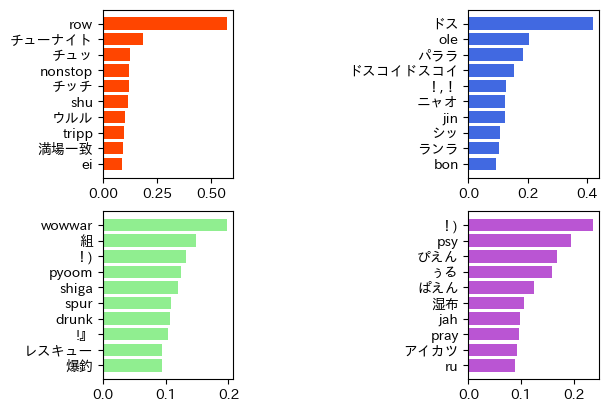

In [ ]:
create_ranking_plot(kind="nouns")

### ngram解析

In [ ]:
df_1990 = df[df["年代"] == 1990]
df_2000 = df[df["年代"] == 2000]
df_2010 = df[df["年代"] == 2010]
df_2020 = df[df["年代"] == 2020]

#### 各クラスで登場する単語を集計した列を追加（一度行えば不要）

In [ ]:
import MeCab

# 極性辞書の作成
dict_polarity = {}

def get_score_words_list(text):
    all_words_list = []
    words_list_verb = []
    words_list_noun = []
    words_list_adjective = []
    verb_noun_adjective = []
    score = 0

    mecab = MeCab.Tagger("-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")
    m_data = mecab.parse(text)
    m_data = m_data.split("\n")
    for x in m_data:
        w_data = x.split(",")
        if len(w_data) > 4:
            genkei = w_data[-3]
            all_words_list.append(genkei)
            word_class = w_data[0].split("\t")[-1]
            # if genkei in dict_polarity and word_class != "名詞": #in ["助詞","副詞","形容詞","動詞"]:
            #     score += float(dict_polarity[genkei])
            if word_class == "動詞":
                words_list_verb.append(genkei)
                verb_noun_adjective.append(genkei)
            elif word_class == "形容詞":
                words_list_adjective.append(genkei)
                verb_noun_adjective.append(genkei)
            elif word_class == "名詞":
                words_list_noun.append(genkei)
                verb_noun_adjective.append(genkei)
    return score,all_words_list,words_list_verb,words_list_adjective,words_list_noun,verb_noun_adjective

ModuleNotFoundError: ignored

In [ ]:
score = []
all_words_list_class1 = []
words_list_verb_class1 = []
words_list_noun_class1 = []
words_list_adjective_class1 = []
noun_verb_adjective = []
index_df = []

for index, row in df_1990.iterrows():
    text = row.歌詞
    score_polarity,all_words,verb,adjective,noun,verb_noun_ad = get_score_words_list(text)
    score.append(score_polarity)
    all_words_list_class1.append(all_words)
    words_list_verb_class1.append(verb)
    words_list_noun_class1.append(noun)
    noun_verb_adjective.append(verb_noun_ad)
    words_list_adjective_class1.append(adjective)

    index_df.append(index)
    if len(score)%100000 ==0:
        print(len(score))
score_series = pd.Series(score, index=index_df)
verb_series = pd.Series(words_list_verb_class1, index_df)
noun_series = pd.Series(words_list_noun_class1, index_df)
adjective_series = pd.Series(words_list_adjective_class1, index_df)

df_1990["score"] = score_series
df_1990["verb_list"] = verb_series
df_1990["noun_list"] = noun_series
df_1990["adjective_list"] = adjective_series
df_1990["all_words_list"] = all_words_list_class1
df_1990["noun_verb_adjective"] = noun_verb_adjective

<ipython-input-83-9d598fb07f82>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990["score"] = score_series
<ipython-input-83-9d598fb07f82>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1990["verb_list"] = verb_series
<ipython-input-83-9d598fb07f82>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
score = []
all_words_list_class2 = []
words_list_verb_class2 = []
words_list_noun_class2 = []
words_list_adjective_class2 = []
noun_verb_adjective = []
index_df = []

for index, row in df_2000.iterrows():
    text = row.歌詞
    score_polarity,all_words,verb,adjective,noun,verb_noun_ad = get_score_words_list(text)
    score.append(score_polarity)
    all_words_list_class2.append(all_words)
    words_list_verb_class2.append(verb)
    words_list_noun_class2.append(noun)
    noun_verb_adjective.append(verb_noun_ad)
    words_list_adjective_class2.append(adjective)

    index_df.append(index)
    if len(score)%100000 ==0:
        print(len(score))
score_series = pd.Series(score, index=index_df)
verb_series = pd.Series(words_list_verb_class2, index=index_df)
noun_series = pd.Series(words_list_noun_class2, index=index_df)
adjective_series = pd.Series(words_list_adjective_class2, index=index_df)

df_2000["score"] = score_series
df_2000["verb_list"] = verb_series
df_2000["noun_list"] = noun_series
df_2000["adjective_list"] = adjective_series
df_2000["all_words_list"] = all_words_list_class2
df_2000["noun_verb_adjective"] = noun_verb_adjective

<ipython-input-84-a7169c046565>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000["score"] = score_series
<ipython-input-84-a7169c046565>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000["verb_list"] = verb_series
<ipython-input-84-a7169c046565>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
score = []
all_words_list_class3 = []
words_list_verb_class3 = []
words_list_noun_class3 = []
words_list_adjective_class3 = []
noun_verb_adjective = []
index_df = []

for index, row in df_2010.iterrows():
    text = row.歌詞
    score_polarity,all_words,verb,adjective,noun,verb_noun_ad = get_score_words_list(text)
    score.append(score_polarity)
    all_words_list_class3.append(all_words)
    words_list_verb_class3.append(verb)
    words_list_noun_class3.append(noun)
    noun_verb_adjective.append(verb_noun_ad)
    words_list_adjective_class3.append(adjective)

    index_df.append(index)
    if len(score)%100000 ==0:
        print(len(score))
score_series = pd.Series(score, index=index_df)
verb_series = pd.Series(words_list_verb_class3, index=index_df)
noun_series = pd.Series(words_list_noun_class3, index=index_df)
adjective_series = pd.Series(words_list_adjective_class3, index=index_df)

df_2010["score"] = score_series
df_2010["verb_list"] = verb_series
df_2010["noun_list"] = noun_series
df_2010["adjective_list"] = adjective_series
df_2010["all_words_list"] = all_words_list_class3
df_2010["noun_verb_adjective"] = noun_verb_adjective

<ipython-input-85-f9ca919ceb71>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010["score"] = score_series
<ipython-input-85-f9ca919ceb71>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010["verb_list"] = verb_series
<ipython-input-85-f9ca919ceb71>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
score = []
all_words_list_class4 = []
words_list_verb_class4 = []
words_list_noun_class4 = []
words_list_adjective_class4 = []
noun_verb_adjective = []
index_df = []

for index, row in df_2020.iterrows():
    text = row.歌詞
    score_polarity,all_words,verb,adjective,noun,verb_noun_ad = get_score_words_list(text)
    score.append(score_polarity)
    all_words_list_class4.append(all_words)
    words_list_verb_class4.append(verb)
    words_list_noun_class4.append(noun)
    noun_verb_adjective.append(verb_noun_ad)
    words_list_adjective_class4.append(adjective)

    index_df.append(index)
    if len(score)%100000 ==0:
        print(len(score))
score_series = pd.Series(score, index=index_df)
verb_series = pd.Series(words_list_verb_class4, index=index_df)
noun_series = pd.Series(words_list_noun_class4, index=index_df)
adjective_series = pd.Series(words_list_adjective_class4, index=index_df)

df_2020["score"] = score_series
df_2020["verb_list"] = verb_series
df_2020["noun_list"] = noun_series
df_2020["adjective_list"] = adjective_series
df_2020["all_words_list"] = all_words_list_class4
df_2020["noun_verb_adjective"] = noun_verb_adjective

<ipython-input-86-393619d86182>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020["score"] = score_series
<ipython-input-86-393619d86182>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020["verb_list"] = verb_series
<ipython-input-86-393619d86182>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
df_1990.to_csv(path + "data/df_1990_with_word_list", index=False)
df_2000.to_csv(path + "data/df_2000_with_word_list", index=False)
df_2010.to_csv(path + "data/df_2010_with_word_list", index=False)
df_2020.to_csv(path + "data/df_2020_with_word_list", index=False)

#### 単語解析

In [ ]:
!pip install nlplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.9/967.9 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.7 MB/s eta 0:00:00


In [ ]:
df_1990 = pd.read_csv(path + "data/df_1990_with_word_list")
df_2000 = pd.read_csv(path + "data/df_2000_with_word_list")
df_2010 = pd.read_csv(path + "data/df_2010_with_word_list")
df_2020 = pd.read_csv(path + "data/df_2020_with_word_list")

In [ ]:
import plotly.io as pio
import nlplot
from plotly.subplots import make_subplots
import ast

target = "verb_list" # "verb_list", "noun_list", "adjective_list", "all_words_list", "noun_verb_adjective"

num_disp = 20

# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# ストップワーズ設定
# stopwords = npt_class1.get_stopword(top_n=0, min_freq=0)
stopwords = ["し","い","ある", "おる", "せる", "ない", "いる", "する", "の", "よう", "なる", "てる", "ゆく", "それ", "そこ", "これ", "こう", "ため", "そう", "れる", "られる", "*", "ん", "の", "く", "みる"]


# target列の特定の文字列を除去
# 特定の文字列を除去する関数
def remove_strings(lst, stopwords):
    return [word for word in lst if not any(stopword in word for stopword in stopwords)]

# target列がstr型になっているのでlist型に
if isinstance(df_1990.at[0,target], str):
  df_1990[target] = [ast.literal_eval(d) for d in df_1990[target]]
if isinstance(df_2000.at[0,target], str):
  df_2000[target] = [ast.literal_eval(d) for d in df_2000[target]]
if isinstance(df_2010.at[0,target], str):
  df_2010[target] = [ast.literal_eval(d) for d in df_2010[target]]
if isinstance(df_2020.at[0,target], str):
  df_2020[target] = [ast.literal_eval(d) for d in df_2020[target]]

# target列からstopwordsを省く
df_1990[target] = df_1990[target].apply(lambda x: remove_strings(x, stopwords))
df_2000[target] = df_2000[target].apply(lambda x: remove_strings(x, stopwords))
df_2010[target] = df_2010[target].apply(lambda x: remove_strings(x, stopwords))
df_2020[target] = df_2020[target].apply(lambda x: remove_strings(x, stopwords))

npt_class1 = nlplot.NLPlot(df_1990, target_col=target)
npt_class2 = nlplot.NLPlot(df_2000, target_col=target)
npt_class3 = nlplot.NLPlot(df_2010, target_col=target)
npt_class4 = nlplot.NLPlot(df_2020, target_col=target)

class1_unigram = npt_class1.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=num_disp,
)

class2_unigram = npt_class2.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=num_disp,
    stopwords=stopwords,
)

class3_unigram = npt_class3.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=num_disp,
    stopwords=stopwords,
)

class4_unigram = npt_class4.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=num_disp,
    stopwords=stopwords,
)

# subplot
trace1 = class1_unigram['data'][0]
trace2 = class2_unigram['data'][0]
trace3 = class3_unigram['data'][0]
trace4 = class4_unigram['data'][0]

# 日本語フォントの設定
pio.orca.config.executable = '/usr/local/bin/orca'  # Orcaのパスに変更してください
pio.orca.config.use_xvfb = True
pio.orca.config.save()

pio.templates.default = "none"

fig = make_subplots(rows=2, cols=2, subplot_titles=('1990s', '2000s','2010s','2020s'), shared_xaxes=False, vertical_spacing=0.1, horizontal_spacing=0.1)
fig.update_xaxes(title_text='word count', row=1, col=1)
fig.update_xaxes(title_text='word count', row=1, col=2)
fig.update_xaxes(title_text='word count', row=2, col=1)
fig.update_xaxes(title_text='word count', row=2, col=2)

fig.update_layout(height=1200, width=1600)#, title_text='4classes unigrams')
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=2, col=1)
fig.add_trace(trace4, row=2, col=2)

fig.show()


class1_unigram = npt_class1.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=num_disp,
)

100%|██████████| 1000/1000 [00:00<00:00, 27793.60it/s]


100%|██████████| 1000/1000 [00:00<00:00, 70396.67it/s]


In [ ]:
# 特定の単語の順位を調べる
top_n = 500
target_word = "愛す"
for x in [npt_class1, npt_class2, npt_class3, npt_class4]:
  class_unigram = x.bar_ngram(
      title='uni-gram',
      xaxis_label='word_count',
      yaxis_label='word',
      ngram=1,
      top_n=top_n,
  )

  # 単語の順位をランキングとして表示
  words = class_unigram['data'][0]['y']
  word_counts = class_unigram['data'][0]['x']


  r = -1
  for rank, (word, count) in reversed(list(enumerate(zip(words, word_counts), start=1))):
      # print(f'{top_n - rank + 1}. {word}: {count}') # ランキング表示
      if word == target_word:
          r = top_n - rank + 1

  print(f'{target_word} の順位: {r}')

100%|██████████| 1000/1000 [00:00<00:00, 33123.82it/s]


愛す の順位: 5


100%|██████████| 1000/1000 [00:00<00:00, 39487.70it/s]


愛す の順位: 12


100%|██████████| 1000/1000 [00:00<00:00, 54049.61it/s]


愛す の順位: 21


100%|██████████| 1000/1000 [00:00<00:00, 44362.11it/s]


愛す の順位: 25


## Sentence BERTのファインチューニングにより歌詞の分類を行う（失敗）

https://qiita.com/takubb/items/fd972f0ac3dba909c293#bertforsequenceclassification

### ライブラリのインストール

In [ ]:
!pip install transformers fugashi ipadic sentencepiece huggingface_hub

In [ ]:
# インターネットでダウンロードできる時に実行
from huggingface_hub import snapshot_download
download_path = snapshot_download(repo_id="sonoisa/sentence-bert-base-ja-mean-tokens-v2")

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
import torch
# GPUが使えれば利用する設定
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### データのロードと前処理

In [ ]:
import pandas as pd
df = pd.read_csv(path + "data/data_natural_language.csv")
df.drop(["id", "タイトル", "アーティスト", "作詞者", "発売日", "発売年"], axis=1, inplace=True)
df["年代"] = (df["年代"] - 1990)//10

In [ ]:
df

,歌詞,年代
0,哀しみを抱えたまま その腕に抱かれたけど“もう誰も愛せない”なんて 投げやりな言い方に少し寂...,0
1,逢いたくて 恋しくて死ぬほど好きなあなたにフラれた後も I miss you孤独な夜がまた来...,3
2,Heartが Beatが 眩しく からむ妖しく 夢みて 秘密の Hang Out！赤く染めら...,0
3,海は荒海 向うは佐渡よすずめなけなけ もう日は暮れたみんな呼べ呼べ お星さま出たぞ暮れりゃ砂...,3
4,ON YOUR MARK！HEY YO！ GET SET！OH！ ONCE IF YOU A...,2
...,...,...
3995,I say love callsBlue ocean sparkingLove shines...,1
3996,つまんない授業さぼってあの丘へ繰り出そうつまんないことだってきっと忘れるさ景色は変わんないの...,1
3997,あんたの心が 寂しいときは隣りで この手で 暖めるから世の中なんかは 悲しみばかりせめて 身...,0
3998,Daylight沈む陽を背にして walking now少しずつ遠くなる影追いかけて今どこに...,3


In [ ]:
# データの抽出
sentences = df.歌詞.values
labels = df.年代.values

In [ ]:
# 1. BERT Tokenizerを用いて単語分割・IDへ変換
## Tokenizerの準備
from transformers import BertJapaneseTokenizer
tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese')

## テスト実行
# 元文章
print(' Original: ', sentences[0])
# Tokenizer
print('Tokenized: ', tokenizer.tokenize(sentences[0]))
# Token-id
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))


 Original:  哀しみを抱えたまま その腕に抱かれたけど“もう誰も愛せない”なんて 投げやりな言い方に少し寂しそうな 目をしたけど“待てるだけ待つよ”と言ってくれた あなた......Time after time 泣きたいくらいTime after time いい人なのにTime after time わかっててもとびこめないのよ やさしさが辛い 今でもmum...... 哀しい少しだけ落ち着いたら 死ぬ程に思いつめたあの日々が色褪せて来たわ だけどまだ許せない“仕方がないんだ”と 呟いてたあの時の場面が焼きついてる 今も......Night after night 泣くだけ泣いてNight after night 疲れて眠るNight after night 何をしても戻って来ないと どこかで知ってた“どうにもならない”と 繰り返して謝り続けてた あの日のこと 今も……Time after time 哀しみ抱いてTime after time 迷ってばかりTime after time うつろな日々忘れることなど 出来ないの 彼を今でも mum...... 切ない
Tokenized:  ['哀', '##しみ', 'を', '抱え', 'た', 'まま', 'その', '腕', 'に', '抱か', 'れ', 'た', 'けど', '“', 'もう', '誰', 'も', '愛', '##せ', 'ない', '”', 'なんて', '投げ', '##やり', 'な', '言い方', 'に', '少し', '寂', '##し', 'そう', 'な', '目', 'を', 'し', 'た', 'けど', '“', '待', '##てる', 'だけ', '待つ', 'よ', '”', 'と', '言っ', 'て', 'くれ', 'た', 'あなた', '......', 'Time', 'a', '##ft', '##er', 't', '##ime', '泣き', 'たい', 'くらい', 'Time', 'a', '##ft', '##er', 't', '##ime', 'いい', '人', 'な', 'のに', 'Time', 'a', '##ft', '##er', 't', '##ime', 'わかっ', 'て', 'て', 'も', 'と',

In [ ]:
# 最大単語数の確認
max_len = []
# 1文づつ処理
for sent in sentences:
    # Tokenizeで分割
    token_words = tokenizer.tokenize(sent)
    # 文章数を取得してリストへ格納
    max_len.append(len(token_words))
# 最大の値を確認
print('最大単語数: ', max(max_len))
print('上記の最大単語数にSpecial token（[CLS], [SEP]）の+2をした値が最大単語数')


最大単語数:  1174
上記の最大単語数にSpecial token（[CLS], [SEP]）の+2をした値が最大単語数


In [ ]:
input_ids = []
attention_masks = []

# 1文づつ処理
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,
                        add_special_tokens=True,   # Special Tokenの追加
                        max_length=512,  # 文章の長さを固定（Padding/Trancatinating）, max(max_len)+2
                        pad_to_max_length = True,# PADDINGで埋める
                        # padding='longest',         # 最長のシーケンスにパディングする
                        return_attention_mask=True, # Attention maskの作成
                        return_tensors='pt',       # PyTorch tensorsで返す
                   )
    # 単語IDを取得
    input_ids.append(encoded_dict['input_ids'])

    # Attention maskの取得
    attention_masks.append(encoded_dict['attention_mask'])


# リストに入ったtensorを縦方向（dim=0）へ結合
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

# tenosor型に変換
labels = torch.tensor(labels)

# 確認
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  哀しみを抱えたまま その腕に抱かれたけど“もう誰も愛せない”なんて 投げやりな言い方に少し寂しそうな 目をしたけど“待てるだけ待つよ”と言ってくれた あなた......Time after time 泣きたいくらいTime after time いい人なのにTime after time わかっててもとびこめないのよ やさしさが辛い 今でもmum...... 哀しい少しだけ落ち着いたら 死ぬ程に思いつめたあの日々が色褪せて来たわ だけどまだ許せない“仕方がないんだ”と 呟いてたあの時の場面が焼きついてる 今も......Night after night 泣くだけ泣いてNight after night 疲れて眠るNight after night 何をしても戻って来ないと どこかで知ってた“どうにもならない”と 繰り返して謝り続けてた あの日のこと 今も……Time after time 哀しみ抱いてTime after time 迷ってばかりTime after time うつろな日々忘れることなど 出来ないの 彼を今でも mum...... 切ない
Token IDs: tensor([    2, 12199, 10309,    11,  6753,    10,  1738,    59,  4657,     7,
        27978,    20,    10, 11218,  2203,  2340,  3654,    28,   767, 28616,
           80,  1964, 15060,  3955, 17038,    18, 27206,     7,  4800, 17830,
        28454,  1778,    18,   219,    11,    15,    10, 11218,  2203,  2323,
         9526,   687, 13482,    54,  1964,    13,  3083,    16,  4831,    10,
         6968, 10531, 16784,  2187, 13848,   275,   822,  8888, 16642,  1549,
         7308, 16784,  21

In [ ]:
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# データセットクラスの作成
dataset = TensorDataset(input_ids, attention_masks, labels)

# 90%地点のIDを取得
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# データセットを分割
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('訓練データ数：{}'.format(train_size))
print('検証データ数:　{} '.format(val_size))

# データローダーの作成
batch_size = 16

# 訓練データローダー
train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset), # ランダムにデータを取得してバッチ化
            batch_size = batch_size
        )

# 検証データローダー
validation_dataloader = DataLoader(
            val_dataset,
            sampler = SequentialSampler(val_dataset), # 順番にデータを取得してバッチ化
            batch_size = batch_size
        )

# テストデータローダー
validation_dataloader = DataLoader(
            val_dataset,
            sampler = SequentialSampler(val_dataset), # 順番にデータを取得してバッチ化
            batch_size = batch_size
        )

訓練データ数：3600
検証データ数:　400 


### 学習済みモデルのロード

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# BertForSequenceClassification 学習済みモデルのロード
model = BertForSequenceClassification.from_pretrained(
    "sonoisa/sentence-bert-base-ja-mean-tokens-v2", # 日本語Pre trainedモデルの指定
    num_labels = 4, # ラベル数（今回はBinayなので2、数値を増やせばマルチラベルも対応可）
    output_attentions = False, # アテンションベクトルを出力するか
    output_hidden_states = False, # 隠れ層を出力するか
)

# モデルをGPUへ転送
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sonoisa/sentence-bert-base-ja-mean-tokens-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# 最適化手法の設定
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# 訓練パートの定義
def train(model):
    model.train() # 訓練モードで実行
    train_loss = 0
    for batch in train_dataloader:# train_dataloaderはword_id, mask, labelを出力する点に注意
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        optimizer.zero_grad()
        loss, logits = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        print(type(loss))
        print(loss)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        train_loss += loss.item()
    return train_loss

# テストパートの定義
def validation(model):
    model.eval()# 訓練モードをオフ
    val_loss = 0
    with torch.no_grad(): # 勾配を計算しない
        for batch in validation_dataloader:
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)
            with torch.no_grad():
                (loss, logits) = model(b_input_ids,
                                    token_type_ids=None,
                                    attention_mask=b_input_mask,
                                    labels=b_labels)
            val_loss += loss.item()
    return val_loss


### 学習の実行

In [ ]:
# 学習の実行
max_epoch = 10
train_loss_ = []
test_loss_ = []

for epoch in range(max_epoch):
    train_ = train(model)
    test_ = train(model)
    train_loss_.append(train_)
    test_loss_.append(test_)

<class 'str'>
loss


AttributeError: ignored

## Sentence BERTを使った歌詞のベクトル化

https://huggingface.co/sonoisa/sentence-bert-base-ja-mean-tokens-v2

In [ ]:
!pip install transformers fugashi ipadic sentencepiece huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.9/599.9 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.0 MB/s eta 0:00:00
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556703 sha256=b5caaa7149bc32c014acb5c98a0e6da99de45b4d152f395f2c0bc4c87d044ebc
  Stored in directory: /root/.cache/pip/wheels/5b/ea/e3/2f6e0860a327daba3b030853fce4483ed37468bbf1101c59c3
Successfully built ipadic


In [ ]:
# インターネットでダウンロードできる時に実行
from huggingface_hub import snapshot_download
download_path = snapshot_download(repo_id="sonoisa/sentence-bert-base-ja-mean-tokens-v2")

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
from transformers import BertJapaneseTokenizer, BertModel
import torch

class SentenceBertJapanese:
    def __init__(self, model_name_or_path, device=None):
        self.tokenizer = BertJapaneseTokenizer.from_pretrained(model_name_or_path)
        self.model = BertModel.from_pretrained(model_name_or_path)
        self.model.eval()

        if device is None:
            device = "cuda" if torch.cuda.is_available() else "cpu"
        self.device = torch.device(device)
        self.model.to(device)

    def _mean_pooling(self, model_output, attention_mask):
        token_embeddings = model_output[0] #First element of model_output contains all token embeddings
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    @torch.no_grad()
    def encode(self, sentences, batch_size=8):
        all_embeddings = []
        iterator = range(0, len(sentences), batch_size)
        for batch_idx in iterator:
            batch = sentences[batch_idx:batch_idx + batch_size]

            encoded_input = self.tokenizer.batch_encode_plus(batch, padding="longest",
                                           truncation=True, return_tensors="pt").to(self.device)
            model_output = self.model(**encoded_input)
            sentence_embeddings = self._mean_pooling(model_output, encoded_input["attention_mask"]).to('cpu')

            all_embeddings.extend(sentence_embeddings)

        # return torch.stack(all_embeddings).numpy()
        return torch.stack(all_embeddings)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
model = SentenceBertJapanese("sonoisa/sentence-bert-base-ja-mean-tokens-v2")
# 出典: https://qiita.com/sonoisa/items/775ac4c7871ced6ed4c3
sentences = list(df_for_use["歌詞"])
sentence_vectors = model.encode(sentences)

NameError: ignored

In [ ]:
df_x = pd.DataFrame(sentence_vectors)
df_xy = pd.concat([df_for_use, df_x], axis=1)

In [ ]:
df_y = df_for_use['年代']

In [ ]:
df_xy.to_csv(path + "data/data_all_info.csv", index = False)

### 学習しやすいようにデータを整形し保存

In [ ]:
from sklearn.model_selection import train_test_split

# データの分割
# train_test_split関数を使用し、トレーニングデータ、バリデーションデータ、テストデータに分割します
x_train, x_temp, t_train, t_temp = train_test_split(df_x, df_y, test_size=0.4, random_state=42)
x_val, x_test, t_val, t_test = train_test_split(x_temp, t_temp, test_size=0.5, random_state=42)

# 分割結果の確認
print("トレーニングデータのサイズ:", x_train.shape)
print("バリデーションデータのサイズ:", x_val.shape)
print("テストデータのサイズ:", x_test.shape)

トレーニングデータのサイズ: (2400, 768)
バリデーションデータのサイズ: (800, 768)
テストデータのサイズ: (800, 768)


In [ ]:
import numpy as np

# データをNumPy配列に変換
x_train_array = np.array(x_train)
x_val_array = np.array(x_val)
x_test_array = np.array(x_test)
t_train_array = np.array(t_train)
t_val_array = np.array(t_val)
t_test_array = np.array(t_test)

# npyファイルとして保存
np.save('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/x_train.npy', x_train_array)
np.save('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/x_val.npy', x_val_array)
np.save('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/x_test.npy', x_test_array)
np.save('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/t_train.npy', t_train_array)
np.save('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/t_val.npy', t_val_array)
np.save('/content/drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/t_test.npy', t_test_array)

## 主成分分析による可視化

In [ ]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
df_xy = pd.read_csv(path + "data/data_all_info.csv")
df_xy.drop(["id", "タイトル", "アーティスト", "作詞者", "発売日", "歌詞", "発売年"], axis=1, inplace=True)
print(df_xy.head(5))

参考 https://qiita.com/maskot1977/items/082557fcda78c4cdb41f

In [ ]:
# 行列の標準化
dfs = df_xy.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.693293,0.434265,1.488056,-0.170814,-1.537586,-0.907558,-0.128533,0.496084,0.190133,0.272101,...,1.594398,-1.442148,0.425014,-2.741643,0.286103,0.578619,1.168971,1.022041,0.122736,-0.402702
1,0.242450,0.391106,-0.269519,1.448660,0.209700,-1.114086,-0.441884,-0.022959,0.263920,-0.806286,...,-0.496860,-0.084797,0.399701,-0.063204,0.726779,-0.162888,-0.685329,0.558086,1.493102,-0.178535
2,-1.834447,1.406540,0.622438,-0.230440,-0.213983,-1.079783,1.531843,-0.697727,0.076764,0.581397,...,0.020772,-1.354174,0.581373,-0.861354,1.656636,-0.598980,0.626606,0.129995,-0.339483,-0.945962
3,-1.453345,-0.613980,-2.202656,1.492379,-0.262708,3.013785,0.216474,-3.034583,-0.070793,1.447982,...,-0.714976,-1.037755,0.597187,-0.951833,-1.105797,1.119281,0.400885,-1.034674,1.317568,2.281760
4,-2.490250,1.265647,0.378613,-1.439622,0.206056,-0.146378,0.775443,0.336233,-1.585712,1.706364,...,-0.218105,-3.375092,-1.032962,-2.033649,1.263086,-3.008721,-1.861782,-2.156702,-1.043869,0.854379


In [ ]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

In [ ]:
df_xy.iloc[:, 0]

0       1990
1       2020
2       1990
3       2020
4       2010
        ... 
3995    2000
3996    2000
3997    1990
3998    2020
3999    2020
Name: 年代, Length: 4000, dtype: int64

<Figure size 600x600 with 0 Axes>

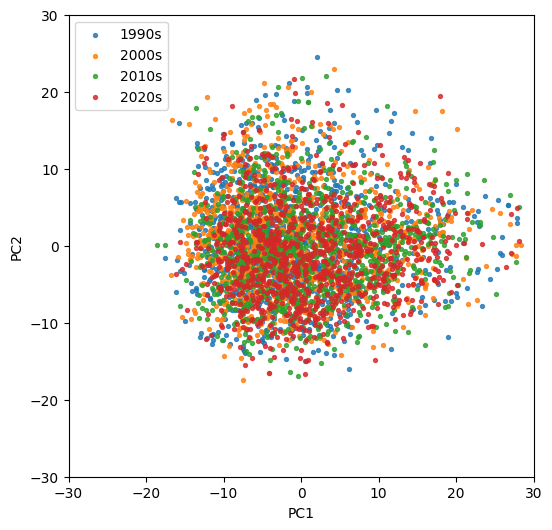

In [ ]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))

# クラスごとのデータを格納する辞書
class_data = {}
# クラスごとにデータを分類
for i in range(len(feature)):
    x, y = feature[i, 0], feature[i, 1]
    cls = df_xy.iloc[i, 0]
    if cls not in class_data:
        class_data[cls] = {'x': [], 'y': []}
    class_data[cls]['x'].append(x)
    class_data[cls]['y'].append(y)

# クラス名を昇順にソート
sorted_classes = sorted(class_data.keys())

# FigureとAxesオブジェクトの作成
fig, ax = plt.subplots(figsize=(6, 6))

# クラスごとにデータをプロット
for cls in sorted_classes:
    data = class_data[cls]
    ax.scatter(data['x'], data['y'], label=str(cls)+"s", alpha=0.8, s=8)

# 凡例の作成
ax.legend()

# グラフの装飾
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# x軸とy軸の範囲を指定
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)

# グラフの表示
plt.savefig("PCA.pdf")
plt.show()

## SVMによる分類

In [ ]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x_train = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/x_train.npy')
t_train = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/t_train.npy')

x_val = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/x_val.npy')
t_val = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/t_val.npy')

x_test = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/x_test.npy')
t_test = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/t_test.npy')

In [ ]:
print(x_train)
print(t_train)

[[-0.24530931 -1.1396085  -0.96641386 ... -0.23132388 -1.0052615
  -0.22328207]
 [-0.46440175 -0.18450993 -0.6432736  ...  0.2634162  -0.28898227
  -0.58306336]
 [ 0.18160418  0.2906918   0.02900777 ...  0.09263038 -0.957809
  -0.33362594]
 ...
 [-0.53485334  0.02835708 -0.66332704 ...  1.0184511  -0.0414392
  -0.5123555 ]
 [-0.40608892 -0.3436249  -0.24841185 ...  0.14277022 -0.7924449
  -0.22420517]
 [ 0.63730574  0.31111643 -0.32499903 ... -0.37262297 -0.29212144
  -0.07368286]]
[2000 1990 2020 ... 2020 2020 2010]


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

def fix_seed(seed):
    # random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

SEED = 42
fix_seed(SEED)


# SVMモデルのインスタンス化
model = svm.SVC()

# SVMモデルの学習
model.fit(x_train, t_train)

# テストデータの予測
t_pred = model.predict(x_val)

# 精度の評価
accuracy = accuracy_score(t_val, t_pred)
print("Validation Accuracy:", round(accuracy,4))


# テストデータの予測
t_pred = model.predict(x_test)

# 精度の評価
accuracy = accuracy_score(t_test, t_pred)
print("Test Accuracy:", round(accuracy,4))

Validation Accuracy: 0.3962
Test Accuracy: 0.4238


## LSTMによる分類（失敗）

In [ ]:
# ライブラリのインポート

!pip install portalocker

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from collections import Counter
from typing import List
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence
import torchtext
from torchtext import data
from torchtext import datasets
from torchtext.vocab import vocab
from torchtext.data.utils import get_tokenizer
from sklearn.metrics import f1_score


In [ ]:
df = pd.read_csv(path + "data/data_natural_language_morpheme.csv")

In [ ]:
df.head(5)

,歌詞,年代,uni_adjectives,uni_nouns,uni_nvas,uni_alls,tri_nouns,tri_nvas,tri_alls,four_nouns,four_nvas,four_alls
0,哀しみを抱えたまま その腕に抱かれたけど“もう誰も愛せない”なんて 投げやりな言い方に少し寂...,1990,寂し いい やさし 辛い 哀しい ない 切ない,哀しみ まま 腕 誰 投げやり 言い方 そう 目 あなた ...... time afte...,哀しみ 抱え まま 腕 抱か れ 誰 愛せ 投げやり 言い方 寂し そう 目 し 待てる ...,哀しみ を 抱え た まま その 腕 に 抱か れ た けど “ もう 誰 も 愛せ ない...,哀しみ/まま/腕 まま/腕/誰 腕/誰/投げやり 誰/投げやり/言い方 投げやり/言い方/そ...,哀しみ/抱え/まま 抱え/まま/腕 まま/腕/抱か 腕/抱か/れ 抱か/れ/誰 れ/誰/愛せ...,哀しみ/を/抱え を/抱え/た 抱え/た/まま た/まま/その まま/その/腕 その/腕/に...,哀しみ/まま/腕/誰 まま/腕/誰/投げやり 腕/誰/投げやり/言い方 誰/投げやり/言い方...,哀しみ/抱え/まま/腕 抱え/まま/腕/抱か まま/腕/抱か/れ 腕/抱か/れ/誰 抱か/れ...,哀しみ/を/抱え/た を/抱え/た/まま 抱え/た/まま/その た/まま/その/腕 まま/そ...
1,逢いたくて 恋しくて死ぬほど好きなあなたにフラれた後も I miss you孤独な夜がまた来...,2020,恋しく 甘く 赤い く 悲しい,好き あなた フラ 後 i miss you 孤独 夜 i ' m alright 今夜 ...,逢い 恋しく 死ぬ 好き あなた フラ れ 後 i miss you 孤独 夜 来る i ...,逢い たく て 恋しく て 死ぬ ほど 好き な あなた に フラ れ た 後 も i m...,好き/あなた/フラ あなた/フラ/後 フラ/後/i 後/i/miss i/miss/you ...,逢い/恋しく/死ぬ 恋しく/死ぬ/好き 死ぬ/好き/あなた 好き/あなた/フラ あなた/フラ...,逢い/たく/て たく/て/恋しく て/恋しく/て 恋しく/て/死ぬ て/死ぬ/ほど 死ぬ/ほ...,好き/あなた/フラ/後 あなた/フラ/後/i フラ/後/i/miss 後/i/miss/yo...,逢い/恋しく/死ぬ/好き 恋しく/死ぬ/好き/あなた 死ぬ/好き/あなた/フラ 好き/あなた...,逢い/たく/て/恋しく たく/て/恋しく/て て/恋しく/て/死ぬ 恋しく/て/死ぬ/ほど ...
2,Heartが Beatが 眩しく からむ妖しく 夢みて 秘密の Hang Out！赤く染めら...,1990,眩しく 妖しく 赤く ない やさしい 長く 眩しく 妖しく ない 妖しく 妖しく,heart beat 秘密 hang out 風 色 君 性 雲間 不死鳥 時 流れ 強烈...,heart beat 眩しく からむ 妖しく 夢み 秘密 hang out 赤く 染め ら...,heart が beat が 眩しく からむ 妖しく 夢み て 秘密 の hang out...,heart/beat/秘密 beat/秘密/hang 秘密/hang/out hang/ou...,heart/beat/眩しく beat/眩しく/からむ 眩しく/からむ/妖しく からむ/妖し...,heart/が/beat が/beat/が beat/が/眩しく が/眩しく/からむ 眩しく...,heart/beat/秘密/hang beat/秘密/hang/out 秘密/hang/ou...,heart/beat/眩しく/からむ beat/眩しく/からむ/妖しく 眩しく/からむ/妖し...,heart/が/beat/が が/beat/が/眩しく beat/が/眩しく/からむ が/眩...
3,海は荒海 向うは佐渡よすずめなけなけ もう日は暮れたみんな呼べ呼べ お星さま出たぞ暮れりゃ砂...,2020,NaN,海 荒海 向う 佐渡 すずめ 日 みんな 星 さま 砂山 汐 鳴り すずめ ちり ぢ 風 ...,海 荒海 向う 佐渡 すずめ なけ 日 暮れ みんな 呼べ 呼べ 星 さま 出 暮れりゃ ...,海 は 荒海 向う は 佐渡 よ すずめ な け なけ もう 日 は 暮れ た みんな 呼...,海/荒海/向う 荒海/向う/佐渡 向う/佐渡/すずめ 佐渡/すずめ/日 すずめ/日/みんな ...,海/荒海/向う 荒海/向う/佐渡 向う/佐渡/すずめ 佐渡/すずめ/なけ すずめ/なけ/日 ...,海/は/荒海 は/荒海/向う 荒海/向う/は 向う/は/佐渡 は/佐渡/よ 佐渡/よ/すずめ...,海/荒海/向う/佐渡 荒海/向う/佐渡/すずめ 向う/佐渡/すずめ/日 佐渡/すずめ/日/み...,海/荒海/向う/佐渡 荒海/向う/佐渡/すずめ 向う/佐渡/すずめ/なけ 佐渡/すずめ/なけ...,海/は/荒海/向う は/荒海/向う/は 荒海/向う/は/佐渡 向う/は/佐渡/よ は/佐渡/...
4,ON YOUR MARK！HEY YO！ GET SET！OH！ ONCE IF YOU A...,2010,いい 物足りない ない もったいない いい 苦し ない,on your mark hey yo get set oh once if you ar...,on your mark hey yo get set oh once if you ar...,on your mark ！ hey yo ！ get set ！ oh ！ once i...,on/your/mark your/mark/hey mark/hey/yo hey/yo/...,on/your/mark your/mark/hey mark/hey/yo hey/yo/...,on/your/mark your/mark/！ mark/！/hey ！/hey/yo h...,on/your/mark/hey your/mark/hey/yo mark/hey/yo/...,on/your/mark/hey your/mark/hey/yo mark/hey/yo/...,on/your/mark/！ your/mark/！/hey mark/！/hey/yo ！...


In [ ]:
df_target =  df.drop(["歌詞", "uni_adjectives", "uni_nouns", "uni_nvas", "tri_nouns", "tri_nvas", "tri_alls", "four_nouns", "four_nvas", "four_alls"], axis = 1)

In [ ]:
df_target

,年代,uni_alls
0,1990,哀しみ を 抱え た まま その 腕 に 抱か れ た けど “ もう 誰 も 愛せ ない...
1,2020,逢い たく て 恋しく て 死ぬ ほど 好き な あなた に フラ れ た 後 も i m...
2,1990,heart が beat が 眩しく からむ 妖しく 夢み て 秘密 の hang out...
3,2020,海 は 荒海 向う は 佐渡 よ すずめ な け なけ もう 日 は 暮れ た みんな 呼...
4,2010,on your mark ！ hey yo ！ get set ！ oh ！ once i...
...,...,...
3995,2000,i say love callsblue ocean sparkinglove shine...
3996,2000,つまんない 授業 さぼっ て あの 丘 へ 繰り出そ う つまんない こと だって きっと...
3997,1990,あんた の 心 が 寂しい とき は 隣り で この 手 で 暖める から 世の中 なんか...
3998,2020,daylight 沈む 陽 を 背 に し て walking now 少し ずつ 遠く ...


In [ ]:
from collections import defaultdict
import re

word_dict = defaultdict(int)
word_dict["<PAD>"] = 0
cnt = 1
word_ids = [[] for _ in range(len(df_target))]

max_length = 0

# 無視するパターン
pattern = r"[\．_－―─！＠＃＄％＾＆\-‐|\\＊\“（）＿■×+α※÷⇒—●★☆〇◎◆▼◇△□(：〜～＋=)／*&^%$#@!~`){}［］…\[\]\"\'\”\’:;<>?＜＞〔〕〈〉？、。・,\./『』【】「」→←○《》≪≫\n\u3000]+"

for i in range(len(df_target)):
  words = df_target.iloc[i][1]
  word_list = words.split(" ")

  for w in word_list:
    if (re.search(pattern, w)) or (len(w)==0):
        continue

    # すでにdictにある単語なら、その文章に登場する単語idに追加するだけ
    if w in word_dict:
      word_ids[i].append(word_dict[w])

    # すでにdictにない単語なら、その文章に登場する単語idと、word_dictに単語を追加
    if w not in word_dict:
      word_dict[w] = cnt
      word_ids[i].append(word_dict[w])
      cnt += 1

  # 最も長い文章の長さを更新
  max_length = max(max_length, len(word_ids[i]))

# <PAD>トークンを使って単語ID列の長さを合わせる
for i in range(len(df_target)):
    word_ids[i] += [word_dict['<PAD>']] * (max_length - len(word_ids[i]))



In [ ]:
print(word_ids[0])
print(len(word_dict))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 4, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 8, 21, 22, 23, 19, 24, 2, 25, 4, 11, 26, 27, 28, 29, 30, 31, 32, 33, 4, 34, 35, 36, 35, 37, 38, 39, 35, 36, 35, 40, 41, 19, 42, 35, 36, 35, 43, 32, 32, 14, 44, 16, 45, 29, 46, 47, 48, 49, 50, 51, 52, 53, 21, 27, 54, 55, 56, 57, 8, 58, 4, 59, 60, 48, 61, 32, 62, 4, 63, 64, 11, 65, 66, 16, 67, 48, 16, 68, 64, 30, 69, 32, 4, 59, 70, 45, 71, 48, 72, 73, 50, 14, 74, 36, 74, 75, 27, 76, 32, 74, 36, 74, 77, 32, 78, 74, 36, 74, 79, 2, 25, 32, 14, 80, 32, 62, 16, 30, 81, 82, 83, 84, 32, 4, 85, 8, 14, 86, 16, 30, 87, 32, 88, 89, 32, 4, 59, 90, 45, 91, 50, 14, 35, 36, 35, 1, 92, 32, 35, 36, 35, 93, 32, 94, 35, 36, 35, 95, 19, 60, 96, 91, 97, 98, 16, 45, 99, 2, 50, 51, 52, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
print(cnt)
print(word_dict["<PAD>"])
print(word_dict["哀しみ"])
print(word_dict["を"])

38481
0
1
2


In [ ]:
df_target["word_ids"] = word_ids

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_temp, t_train, t_temp = train_test_split(df_target["word_ids"].tolist(), df_target["年代"].tolist(), test_size=0.4, random_state=42)
x_val, x_test, t_val, t_test = train_test_split(x_temp, t_temp, test_size=0.5, random_state=42)

In [ ]:
# 二次元リストをPyTorchのテンソルに変換
x_train = torch.tensor(x_train)
x_val = torch.tensor(x_val)
x_test = torch.tensor(x_test)
t_train = torch.tensor(t_train)
t_val = torch.tensor(t_val)
t_test = torch.tensor(t_test)

t_train = (t_train - 1990) // 10
t_val = (t_val - 1990) // 10
t_test = (t_test - 1990) // 10

In [ ]:
print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("t_train shape:", t_train.shape)
print("t_val shape:", t_val.shape)
print("t_test shape:", t_test.shape)

x_train shape: torch.Size([2400, 753])
x_val shape: torch.Size([800, 753])
x_test shape: torch.Size([800, 753])
t_train shape: torch.Size([2400])
t_val shape: torch.Size([800])
t_test shape: torch.Size([800])


In [ ]:
# 一番長い歌詞の単語IDを確認

# for _ in range(len(x_train)):
#   l = torch.count_nonzero(x_train[_])
#   if l == x_train.shape[1]:
#     print(_)

for _ in range(len(x_val)):
  l = torch.count_nonzero(x_val[_])
  if l == x_train.shape[1]:
    print(_)

# for _ in range(len(x_test)):
#   l = torch.count_nonzero(x_test[_])
#   if l == x_train.shape[1]:
#     print(_)


print(x_val[527])

527
tensor([17617, 17618,   434,   131,   562,    10,    32,   584,     4,   334,
           79,   570,   434,   806,    48, 17617, 17618,    19,    45,    82,
           85,    82,  5594,    25,    32,  1078,   334,    79,   570,   434,
         1642,   110,   206,   207,  1773,  2097,   206,   207,  1773,   206,
          207,  1773,  2097,   206,   207,  1773,   206,   207,  1773,  2097,
        17619,   207,  1773,  2097,   206,   207,  1773,   206,   207,  1773,
        17620,   206,   207,  1773,  2097, 17621,   308,   183,   308,   807,
           45,    48,  9329,  1676,    82,    86,   390,  1085,   183,  1085,
           32,    45,    14,  1861,   846,   149,    30,   565,   390,  5571,
           25,   480,    19,    97,   144, 17622,    83,  1204,  1029,   149,
           48,  5571,    25,   480,    19,  7680,  5571,    25,    32, 17623,
         1029,   149,   421,   115,    30,  3923,   115,    30,   115,  1500,
           30,  1493,   183, 17624,   184,   562,   130,    

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn

# バッチサイズを指定
batch_size = 32

# TensorDatasetを作成
train_dataset = TensorDataset(x_train, t_train)
val_dataset = TensorDataset(x_val, t_val)
test_dataset = TensorDataset(x_test, t_test)

# DataLoaderを作成
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# torch.log(0)によるnanを防ぐための関数
def torch_log(x):
    return torch.log(torch.clamp(x, min=1e-10))

In [ ]:
# LSTMモデルを定義
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tag_size):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, tag_size)

    def forward(self, x):
        embeds = self.embedding(x)
        lstm_out, _ = self.lstm(embeds)
        output = self.fc(lstm_out[:, -1, :])
        return output

In [ ]:
# モデルの初期化
EMBEDDING_DIM = 10
HIDDEN_DIM = 128
VOCAB_SIZE = len(word_dict)
TAG_SIZE = 4
model = LSTMClassifier(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_SIZE, TAG_SIZE)

# 学習と検証
epochs = 1
best_val_accuracy = 0.0
best_epoch = 0
lr = 0.01

# CUDAを使用する場合
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 損失関数と最適化関数を定義
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader


for epoch in range(epochs):
    model.train()

    for x_batch, t_batch in train_loader:
        # print(x_batch.shape)
        # print(t_batch.shape)

        # # NumPy配列に変換
        # numpy_array = x_batch.numpy()

        # # 0の要素を削除し、2次元形状を保持
        # non_zero_elements = numpy_array[np.nonzero(numpy_array)]

        # print(non_zero_elements.shape)


        # # NumPy配列をTensorに変換
        # x_batch = torch.tensor(non_zero_elements)

        # print(x_batch.shape)

        # x_batchとt_batchをGPUに移す
        x_batch, t_batch = x_batch.to(device), t_batch.to(device)

        optimizer.zero_grad()

        # # 各テンソルの0のインデックスを高速に取得し、要素の長さを計算する
        # lengths = [torch.where(t == 0)[0][0].item() if (t == 0).any() else len(t) for t in x_batch]

        # # pack_padded_sequenceを使ってパディングされた部分を無視する
        # packed_x = nn.utils.rnn.pack_padded_sequence(x_batch, lengths, batch_first=True, enforce_sorted=False)

        # print(x_batch.shape)

        output = model(x_batch)
        # output = model(packed_x)
        loss = loss_function(output, t_batch)
        loss.backward()
        optimizer.step()

    # 検証データでのaccuracyとlossを計算
    model.eval()
    valid_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for x_batch, t_batch in val_loader:
            # NumPy配列に変換
            numpy_array = x_batch.numpy()

            # # 0の要素を削除し、2次元形状を保持
            # non_zero_elements = numpy_array[np.nonzero(numpy_array)]

            # # NumPy配列をTensorに変換
            # x_batch = torch.tensor(non_zero_elements)

            # x_batchとt_batchをGPUに移す
            x_batch, t_batch = x_batch.to(device), t_batch.to(device)

            # # 各テンソルの0のインデックスを高速に取得し、要素の長さを計算する
            # lengths = [torch.where(t == 0)[0][0].item() if (t == 0).any() else len(t) for t in x_batch]

            # # pack_padded_sequenceを使ってパディングされた部分を無視する
            # packed_x = nn.utils.rnn.pack_padded_sequence(x_batch, lengths, batch_first=True, enforce_sorted=False)

            # print(x_batch.shape)

            # # 各テンソルの0のインデックスを高速に取得し、要素の長さを計算する
            # lengths = [torch.where(t == 0)[0][0].item() if (t == 0).any() else len(t) for t in x_batch]

            # # pack_padded_sequenceを使ってパディングされた部分を無視する
            # packed_x = nn.utils.rnn.pack_padded_sequence(x_batch, lengths, batch_first=True, enforce_sorted=False)

            output = model(x_batch)
            # output = model(packed_x)
            loss = loss_function(output, t_batch)
            valid_loss += loss.item()


            _, predicted = torch.max(output.data, 1)
            total += t_batch.size(0)
            # print(predicted)
            correct += (predicted == t_batch).sum().item()

    val_accuracy = 100 * correct / total

    # 各epochの終了時に検証データのlossとaccuracyを1行で表示
    print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {valid_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # 最も良いaccuracyを持つepochを記録
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_epoch = epoch

# 最適な学習epochを表示
print(f"Best Validation Accuracy: {best_val_accuracy:.2f}% at Epoch {best_epoch+1}")

torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size([32, 753])
torch.Size

TypeError: ignored

## 単層、多層ニューラルネットワークによる分類

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.autograd as autograd
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import random
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math

In [ ]:
x_train = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/x_train.npy')
t_train = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/t_train.npy')

x_val = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/x_val.npy')
t_val = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/t_val.npy')

x_test = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/x_test.npy')
t_test = np.load('drive/MyDrive/Colab Notebooks/DLBasics2023_colab/最終課題/data/t_test.npy')

# 1990を0,2000を1,2010を2,2020を3に変換
t_train = (t_train - 1990) // 10
t_val = (t_val - 1990) // 10
t_test = (t_test - 1990) // 10

# データの前処理とテンソル化
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.long)
x_val = torch.tensor(x_val, dtype=torch.float32)
t_val = torch.tensor(t_val, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.long)

In [ ]:
print(
    "1990年代の楽曲",
    list(t_train).count(0),
    "2000年代の楽曲",
    list(t_train).count(1),
    "2010年代の楽曲",
    list(t_train).count(2),
    "2020年代の楽曲",
    list(t_train).count(3))
print(
    "1990年代の楽曲",
    list(t_val).count(0),
    "2000年代の楽曲",
    list(t_val).count(1),
    "2010年代の楽曲",
    list(t_val).count(2),
    "2020年代の楽曲",
    list(t_val).count(3))
print(
    "1990年代の楽曲",
    list(t_test).count(0),
    "2000年代の楽曲",
    list(t_test).count(1),
    "2010年代の楽曲",
    list(t_test).count(2),
    "2020年代の楽曲",
    list(t_test).count(3))

1990年代の楽曲 588 2000年代の楽曲 594 2010年代の楽曲 599 2020年代の楽曲 619
1990年代の楽曲 202 2000年代の楽曲 203 2010年代の楽曲 201 2020年代の楽曲 194
1990年代の楽曲 210 2000年代の楽曲 203 2010年代の楽曲 200 2020年代の楽曲 187


In [ ]:
# 学習の際に毎回random_stateを初期化
def fix_seed(seed):
    # random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True


def nn_model(layer, drop_rate, n_neurons):
  if layer == 1:
      model = nn.Linear(768, 4)

  if layer == 2:
      model = nn.Sequential(
          # 2層
          nn.Linear(768, n_neurons),
          nn.ReLU(),
          nn.Dropout(drop_rate),  # ドロップアウト層
          nn.Linear(n_neurons, n_neurons),
          nn.ReLU(),
          nn.Linear(n_neurons, 4),
      )

  if layer == 3:
    model = nn.Sequential(
        # 3層
        nn.Linear(768, n_neurons),
        nn.ReLU(),
        nn.Dropout(drop_rate),  # ドロップアウト層
        nn.Linear(n_neurons, n_neurons),
        nn.ReLU(),
        nn.Dropout(drop_rate),  # ドロップアウト層
        nn.Linear(n_neurons, n_neurons),
        nn.ReLU(),
        nn.Linear(n_neurons, 4),
    )

  if layer == 4:
    model = nn.Sequential(
        # 4層
        nn.Linear(768, n_neurons),
        nn.ReLU(),
        nn.Dropout(drop_rate),  # ドロップアウト層
        nn.Linear(n_neurons, n_neurons),
        nn.ReLU(),
        nn.Dropout(drop_rate),  # ドロップアウト層
        nn.Linear(n_neurons, n_neurons),
        nn.ReLU(),
        nn.Dropout(drop_rate),  # ドロップアウト層
        nn.Linear(n_neurons, n_neurons),
        nn.ReLU(),
        nn.Linear(n_neurons, 4),
    )

  return model


def train_model(lr, n_epochs, patience, batch_size, x_train, t_train, x_val, t_val):
  # 損失関数と最適化手法の定義
  loss_function = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=lr)

  # EarlyStoppingの初期化
  best_loss = float('inf')
  counter = 0

  # 学習ループ
  for epoch in range(n_epochs):
      # 訓練モードに設定
      model.train()

      # ミニバッチごとにデータを取得し、モデルの更新を行う
      for i in range(0, len(x_train), batch_size):
          x_batch = x_train[i:i+batch_size].to(device)
          t_batch = t_train[i:i+batch_size].to(device)

          optimizer.zero_grad()
          output = model(x_batch)
          loss = loss_function(output, t_batch)
          loss.backward()
          optimizer.step()

      # 検証データに対する評価
      model.eval()
      with torch.no_grad():
          x_val = x_val.to(device)
          t_val = t_val.to(device)
          val_output = model(x_val)
          val_loss = loss_function(val_output, t_val)
          val_accuracy = (val_output.argmax(dim=1) == t_val).float().mean().item()

      # エポックごとの結果の表示
      print(f"Epoch: {epoch+1}/{n_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

      # EarlyStoppingのチェック
      if val_loss < best_loss:
          best_loss = val_loss
          counter = 0
      else:
          counter += 1
          if counter >= patience:
              print("Early stopping triggered.")
              break

      # モデルの保存
      torch.save(model.state_dict(), path + "checkpoints/model_checkpoint_layer={}_epoch={}".format(layer, epoch+1))

  print("Optimized epoch = {}".format(epoch + 1 - patience))
  return epoch +1 - patience


def calculate_test_accuracy(layer, optim_epoch, x_test, t_test):
  # 保存したモデルの読み込み
  model.load_state_dict(torch.load(path + "checkpoints/model_checkpoint_layer={}_epoch={}".format(layer,optim_epoch)))

  # モデルの評価モードに設定
  model.eval()

  loss_function = nn.CrossEntropyLoss()

  # テストデータに対する予測
  with torch.no_grad():
      x_test = x_test.to(device)
      t_test = t_test.to(device)
      test_output = model(x_test)
      test_loss = loss_function(test_output, t_test)
      test_accuracy = (test_output.argmax(dim=1) == t_test).float().mean().item()

  print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

In [ ]:
""" ハイパーパラメータの設定 """
# layer = 2
n_neurons = 200
drop_rate = 0.2
n_epochs = 1000
batch_size = 32
patience = 30  # EarlyStoppingのパラメータ
lr = 0.0001

for layer in [1,2,3,4]:

  # 各ループごとでSEEDを固定
  SEED = 42
  fix_seed(SEED)

  model = nn_model(layer=layer, drop_rate=drop_rate, n_neurons=n_neurons)

  # デバイスの設定
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)

  # ネットワークの重みの初期化 精度が低下したため行わない
  for m in model.modules():
      if isinstance(m, nn.Linear):
          # # init.xavier_normal_(m.weight)  # Xavierの初期化法で重みを初期化
          init.kaiming_uniform_(m.weight, a=math.sqrt(5)) # Heの初期化法で重みを初期化
          if m.bias is not None:
              init.zeros_(m.bias)  # バイアスをゼロで初期化


  optim_epoch = train_model(lr, n_epochs, patience, batch_size, x_train, t_train, x_val, t_val)

  calculate_test_accuracy(layer, optim_epoch, x_test, t_test)

Epoch: 1/1000, Validation Loss: 1.3650, Validation Accuracy: 0.3113
Epoch: 2/1000, Validation Loss: 1.3495, Validation Accuracy: 0.3212
Epoch: 3/1000, Validation Loss: 1.3379, Validation Accuracy: 0.3225
Epoch: 4/1000, Validation Loss: 1.3290, Validation Accuracy: 0.3363
Epoch: 5/1000, Validation Loss: 1.3221, Validation Accuracy: 0.3487
Epoch: 6/1000, Validation Loss: 1.3167, Validation Accuracy: 0.3562
Epoch: 7/1000, Validation Loss: 1.3123, Validation Accuracy: 0.3637
Epoch: 8/1000, Validation Loss: 1.3087, Validation Accuracy: 0.3700
Epoch: 9/1000, Validation Loss: 1.3057, Validation Accuracy: 0.3713
Epoch: 10/1000, Validation Loss: 1.3032, Validation Accuracy: 0.3738
Epoch: 11/1000, Validation Loss: 1.3011, Validation Accuracy: 0.3750
Epoch: 12/1000, Validation Loss: 1.2993, Validation Accuracy: 0.3812
Epoch: 13/1000, Validation Loss: 1.2978, Validation Accuracy: 0.3850
Epoch: 14/1000, Validation Loss: 1.2965, Validation Accuracy: 0.3900
Epoch: 15/1000, Validation Loss: 1.2953, Va

**精度のメモ**

SVM
*   Validation Accuracy: 0.3962
*   Test Accuracy: 0.4238


0層（ロジスティック回帰）: Epoch: Epoch: 42
*   Validation Loss: 1.2869, Validation Accuracy: 0.3912
*   Test Loss: 1.2852, Test Accuracy: 0.3937

隠れ層1層あたりのニューロン数50

1層: Epoch: 23
*   Validation Loss: 1.2730, Validation Accuracy: 0.3950
*   Test Loss: 1.2649, Test Accuracy: 0.4162

2層: Epoch: 19
*   Validation Loss: 1.2682, Validation Accuracy: 0.3862
*   Test Loss: 1.2629, Test Accuracy: 0.3900

3層: Epoch: 17
*   Validation Loss: 1.2696, Validation Accuracy: 0.3912
*   Test Loss: 1.2673, Test Accuracy: 0.3837


隠れ層1層あたりのニューロン数100

1層: Epoch: 15
*   Validation Loss: 1.2708, Validation Accuracy: 0.4075
*   Test Loss: 1.2707, Test Accuracy: 0.3987

2層: Epoch: 14
*   Validation Loss: 1.2661, Validation Accuracy: 0.3875
*   Test Loss: 1.2631, Test Accuracy: 0.4025

3層: Epoch: 12
*   Validation Loss: 1.2676, Validation Accuracy: 0.3887
*   Test Loss: 1.2631, Test Accuracy: 0.3713

隠れ層1層あたりのニューロン数200

1層: Epoch: 9
*   Validation Loss: 1.2812, Validation Accuracy: 0.3700
*   Test Loss: 1.2715, Test Accuracy: 0.3925

2層: Epoch: 9
*   Validation Loss: 1.2660, Validation Accuracy: 0.3925
*   Test Loss: 1.2643, Test Accuracy: 0.4050

3層: Epoch: 9
*   Validation Loss: 1.2682, Validation Accuracy: 0.3887
*   Test Loss: 1.2658, Test Accuracy: 0.3713

(※)その他のハイパラ
dropout_rate = 0.2
Batch_size = 32
重みの初期化 Heの初期化
